In [1]:
import os
import pprint
import timeit
import copy
import multiprocessing
import re

import numpy as np
import matplotlib.pyplot as plt

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from functools import reduce

# Load and parse Tensorboard logs

In [3]:
from joblib import delayed, Parallel
# Function to load tensorboard logs from one directory
def load_tensorboard_logs(subdir, parent_dir):
    # Create the full path to the subdirectory
    subdirectory_path = os.path.join(parent_dir, subdir)
    start_time = timeit.default_timer()
    
    # Load TensorBoard logs
    event_acc = EventAccumulator(subdirectory_path)
    event_acc.Reload()

    # Extract scalar values
    scalar_tags = event_acc.Tags()["scalars"]
    scalar_values = {}
    for tag in scalar_tags:
        events = event_acc.Scalars(tag)
        values = [(event.step, event.value) for event in events]
        scalar_values[tag] = values

    end_time = timeit.default_timer()
    iteration_time = end_time - start_time
    return (subdir, scalar_values, iteration_time)

def load_tensorboard_logs_mp(mp):
    return load_tensorboard_logs(*mp)

# Specify the parent directory containing directories with logs
parent_dir = r"C:\Users\matsl\Documents\tensorboard\tensorboard\cpt_iclr"
from pathlib import Path
print(Path(parent_dir).exists())

# Get a list of subdirectories in the parent directory
subdirectories = [subdir for subdir in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, subdir))]

start_time = timeit.default_timer()
# Use a multiprocessing pool to load tensorboard logs in parallel
#with multiprocessing.get_context('spawn').Pool() as pool:
pool = Parallel(n_jobs=-1)
if True:
    total_time = 0
    result_dict = {}
    results = pool(delayed(load_tensorboard_logs_mp)((subdir, parent_dir)) for subdir in subdirectories)
    for subdir, scalar_values, iteration_time in results:
        result_dict[subdir] = scalar_values
        total_time += iteration_time
        print(f'Loaded {os.path.join(parent_dir, subdir)} in {iteration_time} seconds')

end_time = timeit.default_timer()
print("All loaded in {} Seconds".format(end_time - start_time))

True
Loaded C:\Users\matsl\Documents\tensorboard\tensorboard\cpt_iclr\JOB-3145826_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch in 23.714577300000002 seconds
Loaded C:\Users\matsl\Documents\tensorboard\tensorboard\cpt_iclr\JOB-3145828_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch in 25.081676 seconds
Loaded C:\Users\matsl\Documents\tensorboard\tensorboard\cpt_iclr\JOB-3145830_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch in 24.4768285 seconds
Loaded C:\Users\matsl\Documents\tensorboard\tensorboard\cpt_iclr\JOB-3145842_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch in 24.2477873 seconds
Loaded C:\Users\matsl\Documents\tensorboard\tensorboard\cpt_iclr\JOB-3145845_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch in 23.4282101 seconds
Loaded C:\Users\matsl\Documents\tensorboard\tensorboard\cpt_iclr\JOB-3145849_410M_it-132366_wu-0.0

In [4]:
from tqdm import tqdm
# remove empty
for x in [k for k,v in tqdm(result_dict.items()) if v == {}]:
    print(x)
    result_dict.pop(x)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<?, ?it/s]

JOB-3145826_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch
JOB-3145828_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch
JOB-3145830_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch
JOB-3145842_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch
JOB-3145845_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch
JOB-3146436_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch
JOB-3146441_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch
JOB-3146488_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch
JOB-3148650_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch
JOB-3151892_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch
JOB-3152040_410M_it-132366_wu-0.0_mxlr-3e-05_mnlr-3e-05_sch-constant_tr-slim-pajama-300B_f

## Loaded TB directories:

In [5]:
pprint.pprint(list(result_dict.keys()))

['JOB-3145849_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3146028_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_resume',
 'JOB-3146549_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3147091_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3147695_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3148094_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3149031_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3149302_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3149913_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3150303_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3150601_410M_it-132366_wu-0.01_mxlr-0.0003_mn

# Parse Job Info from name

In [6]:
def parse_job_string(job_string):
    # Regular expression pattern for each parameter
    patterns = {
        "Model": r"JOB-\d+_([\d.-]+B)_",    # Look for the model size format e.g., 7.1B
        "It": r"it-(\d+)",        # Look for the iterations number
        "WU": r"wu-([\d.]+)",
        "MaxLR": r"mxlr-([\d.e-]+)",
        "MinLR": r"mnlr-([\d.e-]+)",
        "Sch": r"sch-([\w]+)_",   # Adjusted the regex
        "Tr": r"tr-([\w-]+)_",  # Extract training dataset
        "Postfix": r"(finetune|resume|scratch)$",
    }

    result = ""
    for key in patterns:
        match = re.search(patterns[key], job_string)
        if match:
            if key == "MaxLR":
                # Convert to float and format as scientific notation
                value = "{:e}".format(float(match.group(1)))
                idx = len(value.split('e')[0])
                value = value[:idx].rstrip('0').rstrip('.') + value[idx:]
            else:
                value = match.group(1)
            result += f"{key}={value} "
            
    #result += job_string.split("_")[-1]
    return result.rstrip()  # remove trailing space

input_str = 'JOB-3152028_7-1B_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch'
print(parse_job_string(input_str))

Model=7-1B It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=scratch


In [7]:
#pprint.pprint(list(result_dict.keys()))

In [8]:
#accumulate tb log files by job name
d = {}
for k,v in result_dict.items():
    try:
        d[parse_job_string(k)][k] = v
    except KeyError:
        d[parse_job_string(k)] = {k:v}

In [9]:
#accumulate tb log files by job name
#d = {}
#for k,v in result_dict.items():
#    try:
#        d[k.split("410M_")[-1]][k] = v
#    except KeyError:
#       d[k.split("410M_")[-1]] = {k:v}

In [10]:
pprint.pprint(list(d.keys()))

['It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train '
 'Postfix=scratch',
 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train '
 'Postfix=resume',
 'It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B '
 'Postfix=finetune',
 'It=132366 WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 Sch=cosine Tr=slim-pajama-300B '
 'Postfix=finetune',
 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B '
 'Postfix=finetune',
 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B '
 'Postfix=scratch',
 'It=132366 WU=0.01 MaxLR=6e-04 MinLR=6e-05 Sch=cosine Tr=slim-pajama-300B '
 'Postfix=finetune']


In [11]:
for key in d.keys():
    pprint.pprint(list(d[key].keys()))

['JOB-3145849_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3146549_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3147091_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3147695_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3148094_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3149031_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3149302_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3149913_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3150303_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3150601_410M_it-132366_wu-0.01_mxlr-0.0003_mnlr-3e-05_sch-cosine_tr-pile-train_scratch',
 'JOB-3150994_410M_it-132366_wu-0.01_mxlr-0.0003_m

# Merge Tensorboard logs into a single ordered sequence per run (a run can be many jobs)

In [12]:
def merge_tb_logs(list_dict):
    for k,v in list_dict.items():
        if len(v) > 1:
            temp = sorted(list(v.keys()),key=lambda x:int(x[4:11]))
            accum = {kk:dict(vv) for kk,vv in v[temp[0]].items()}
            
            
            for x in temp[1:]:
                for kk,vv in accum.items():
                        try:
                            accum[kk].update(dict(v[x][kk]))
                        except KeyError as e:
                            print(e)
                            print("Missing key:",kk)
                            print("Outer key:",k)

            #sort the zipped object
            list_dict[k] = {kk:sorted([x for x in zip(tmp.keys(),tmp.values())], key=lambda x: x[0]) for kk,tmp in accum.items()}
        else:
            list_dict[k] = list(v.values())[0]
            
    return list_dict


rd_clone = merge_tb_logs(copy.deepcopy(d))

'train/learning_rate'
Missing key: train/learning_rate
Outer key: It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=scratch
'train/lm_loss'
Missing key: train/lm_loss
Outer key: It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=scratch
'train/loss_scale'
Missing key: train/loss_scale
Outer key: It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=scratch
'runtime/samples_per_sec'
Missing key: runtime/samples_per_sec
Outer key: It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=scratch
'runtime/iteration_time'
Missing key: runtime/iteration_time
Outer key: It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=scratch
'runtime/flops_per_sec_per_gpu'
Missing key: runtime/flops_per_sec_per_gpu
Outer key: It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=scratch
'train/learning_rate'
Missing key: train/learning_rate
Outer key: It=132366 WU=0.0 MaxLR=3

In [90]:
def get_caption(key,use=dict(mx=True,wu=True,mn=True,ds=True,it=True,sh=True)):
    temp = key.split(' ')
    out = ''
    print(temp)
    
    #FIXME: FIX THIS
    if use["sh"]:
        out += f"{'Cosine ' if 'cosine' in key else 'Constant LR '}"
    
    if key in ['WU=0.0 MaxLR=3e-05 MinLR=3e-05 RP','WU=0.0 MaxLR=3e-05 MinLR=3e-05 Pile']:
        out = 'Constant 3e-05'
        
        
        
        if use['it']:
            if temp[3].endswith('10000'):
                out += "Iter. 10000"
            elif temp[3].endswith('27000'):
                out += "Iter. 27000"
            elif 'scratch' in key:
                out += "Iter. 0"
            else:
                out += "Iter. 143000"
        
        return out
    
    
    
        
    if use['mx']:
        out += temp[1].replace("="," ") + " "
    
    if use['mn']:
        out += temp[2].replace("="," ") + " "
        
    
    
    print(temp)
    if use['ds']:
        if "RP" in temp[5]:
            out += 'RP' + " "
        elif 'slim' in temp[5]:
            out += 'SP' + " "
        else: 
            out += 'Pile' + " "
        
    # if use['it']:
    #     if temp[3].endswith('10000'):
    #         out += "Iter. 10000"
    #     elif temp[3].endswith('27000'):
    #         out += "Iter. 27000"
    #     elif 'scratch' in key:
    #         out += "Iter. 0"
    #     else:
    #         out += "Iter. 143000"
            
            
    #if use['it']:
    #    out += temp[6]
    
    
    if "Constant" in out:
        out = out.replace('MaxLR ', " ")
        
    if use['wu']:
        print("WU")
        if 'scratch' in key:
            out += "Iter. 0"
        else: 
            out += temp[0].replace("="," ") + " "
        
    if "It " in out:
        out = out.replace("It ", "Iter. ")
    
            
        
    return out.strip(' ')
    
get_caption('It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B Postfix=finetune',use=dict(mx=False,wu=True,mn=True,ds=False,it=False, sh=True))


['It=132366', 'WU=0.0', 'MaxLR=3e-05', 'MinLR=3e-05', 'Sch=constant', 'Tr=slim-pajama-300B', 'Postfix=finetune']
['It=132366', 'WU=0.0', 'MaxLR=3e-05', 'MinLR=3e-05', 'Sch=constant', 'Tr=slim-pajama-300B', 'Postfix=finetune']
WU


'Constant LR  3e-05 Iter. 132366'

In [83]:
{x:get_caption(x,use=dict(mx=False,wu=True,mn=False,ds=False,it=False, sh=True)) for x in rd_clone.keys()}

['It=132366', 'WU=0.0', 'MaxLR=3e-05', 'MinLR=3e-05', 'Sch=constant', 'Tr=slim-pajama-300B', 'Postfix=finetune']
WU
['It=132366', 'WU=0.0', 'MaxLR=3e-05', 'MinLR=3e-05', 'Sch=constant', 'Tr=slim-pajama-300B', 'Postfix=finetune']
['It=132366', 'WU=0.01', 'MaxLR=1.5e-04', 'MinLR=1.5e-05', 'Sch=cosine', 'Tr=slim-pajama-300B', 'Postfix=finetune']
WU
['It=132366', 'WU=0.01', 'MaxLR=1.5e-04', 'MinLR=1.5e-05', 'Sch=cosine', 'Tr=slim-pajama-300B', 'Postfix=finetune']
['It=132366', 'WU=0.01', 'MaxLR=3e-04', 'MinLR=3e-05', 'Sch=cosine', 'Tr=pile-train', 'Postfix=scratch']
WU
['It=132366', 'WU=0.01', 'MaxLR=3e-04', 'MinLR=3e-05', 'Sch=cosine', 'Tr=pile-train', 'Postfix=scratch']
['It=132366', 'WU=0.01', 'MaxLR=3e-04', 'MinLR=3e-05', 'Sch=cosine', 'Tr=pile-train', 'Postfix=resume']
WU
['It=132366', 'WU=0.01', 'MaxLR=3e-04', 'MinLR=3e-05', 'Sch=cosine', 'Tr=pile-train', 'Postfix=resume']
['It=132366', 'WU=0.01', 'MaxLR=3e-04', 'MinLR=3e-05', 'Sch=cosine', 'Tr=slim-pajama-300B', 'Postfix=finetune']


{'It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B Postfix=finetune': 'It 132366 Constant',
 'It=132366 WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 Sch=cosine Tr=slim-pajama-300B Postfix=finetune': 'It 132366 Cosine',
 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=scratch': 'It 132366 Cosine',
 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=resume': 'It 132366 Cosine',
 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B Postfix=finetune': 'It 132366 Cosine',
 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B Postfix=scratch': 'It 132366 Cosine',
 'It=132366 WU=0.01 MaxLR=6e-04 MinLR=6e-05 Sch=cosine Tr=slim-pajama-300B Postfix=finetune': 'It 132366 Cosine'}

# Setup plotting vars

In [67]:
plt.rcParams['figure.dpi'] = 300 
step_to_token = lambda x : x * 2260992/1000000000

fontdict = {'family': 'serif',
#              'color':  'black',
             'weight': 'normal',
             'size': 12,}

plt.rc('font', **fontdict)

legend_font = {'family': 'serif',
                     'color':  'black',
                     'weight': 'normal',
                     'size': 12,}

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", 
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", 
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5", 
    "#393b79", "#637939", "#8c6d31", "#843c39", "#7b4173", 
    "#5254a3", "#636363", "#8ca252", "#bd9e39", "#ad494a", 
    "#8c6d31", "#393b79", "#637939", "#843c39", "#7b4173", 
    "#5254a3", "#636363", "#8ca252", "#bd9e39", "#ad494a", 
    "#bd9e39", "#ad494a", "#393b79", "#637939", "#8c6d31", 
    "#843c39", "#7b4173", "#5254a3", "#636363", "#8ca252", 
    "#bd9e39", "#ad494a", "#8c6d31", "#843c39", "#7b4173", 
    "#5254a3", "#636363", "#8ca252", "#bd9e39", "#ad494a", 
    "#8c6d31", "#843c39", "#7b4173", "#5254a3", "#636363", 
]

cp1 = ['darkred','black','darkblue','darkorange','darkviolet','darkgreen']
cp2 = ["#ee4035","#f37736","#fdf498","#7bc043","#0392cf"]
cp3 = ['#4b3832','#854442','#fff4e6','#3c2f2f','#be9b7b']

key_to_plot = 'validation/val_0/lm_loss' #pile
key_to_plot = 'validation/val_1/lm_loss' #RP

import re

def parse_params(input_string, param_name):
    # Regular expression pattern to find "PARAM=value" patterns.
    # We use re.escape to ensure that any special characters in the parameter name
    # are treated as literal characters in the regex pattern.
    pattern = re.compile(r"{}=(-?\d+.?\d*(?:e-?\d+)?)".format(re.escape(param_name)))
    
    # Find all matches in the input string and parse them into a list of floats
    param_values = []
    for match in re.finditer(pattern, input_string):
        # Extract value from the match and convert to float, then add to list
        param_values.append(float(match.group(1)))
    
    return param_values

# Example usage:
input_string = "SOME_TEXT param1=3e4 ANOTHER_TEXT param2=1.23e-4 YET_ANOTHER_TEXT param3=42"
param_name = input("Please enter the parameter name to search for: ")

# Find and output param values
param_values = parse_params(input_string, param_name)
print("Values found for {}: {}".format(param_name, param_values))
# Sort data

In [68]:
import re

def parse_params(input_string, param_name):
    # Regular expression pattern to find "PARAM=value" patterns.
    # We use re.escape to ensure that any special characters in the parameter name
    # are treated as literal characters in the regex pattern.
    pattern = re.compile(r"{}=(-?\d*\.?\d+(?:e-?\d+)?)".format(re.escape(param_name)), re.IGNORECASE)
    
    # Find all matches in the input string and parse them into a list of floats
    param_values = []
    for match in re.finditer(pattern, input_string):
        # Extract value from the match and convert to float, then add to list
        param_values.append(float(match.group(1)))
    
    # Check if there are any found values and return the first one if so
    return param_values[0] if param_values else None

# Example usage:
#input_string = "SOME_TEXT MaxLR=3e-4 ANOTHER_TEXT param2=1.23e-4 YET_ANOTHER_TEXT param3=42"
#param_name = input("Please enter the parameter name to search for: ")

# Find and output param values
#param_values = parse_params(input_string, param_name)
#print("Values found for {}: {}".format(param_name, param_values))


In [69]:
print(rd_clone.keys())
rd_clone = dict(sorted(rd_clone.items(), key=lambda x: parse_params(x[0], "WU")))
rd_clone = dict(sorted(rd_clone.items(), key=lambda x: parse_params(x[0], "MaxLR")))

#rd_clone = dict(sorted(rd_clone.items(), key=lambda x: float(x[0].split(' ')[3][len('MaxLR='):])))

#rd_clone = dict(sorted(rd_clone.items(), key=lambda x: float(x[0].split(' ')[2][len('WU='):])))
#rd_clone = dict(sorted(rd_clone.items(), key=lambda x: float(x[0].split(' ')[3][len('MaxLR='):])))

dict_keys(['It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B Postfix=finetune', 'It=132366 WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 Sch=cosine Tr=slim-pajama-300B Postfix=finetune', 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=scratch', 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=resume', 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B Postfix=finetune', 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B Postfix=scratch', 'It=132366 WU=0.01 MaxLR=6e-04 MinLR=6e-05 Sch=cosine Tr=slim-pajama-300B Postfix=finetune'])


# Plotting function  -- Here is where the magic happens

In [70]:

def plot_single(filter_=['Pile','MaxLR=1.5e-04','MaxLR=6e-04','MaxLR=3e-05',
                         '27000','10000'],
                upper_limit=50,
                key_to_plot='validation/val_0/lm_loss',
                ylabel='Tokens (B)',
                xlabel='Pile Val Loss',
                savepath=None, #"lr3e-4-Pile-val-loss-warmup-50B.pdf",
                legend_kwargs=dict(fontsize=12),
                ylim=[],#(2.18,2.55),
                figsize=(7.5,5),
                warmup_end={'0.01':True,'0.02':True,'0.005':True},
                savedir='esfomows/',
                color_dict={},
                ls_dict={},
                circles=False,
                default_colors=colors,
                default_ls =['-' for x in range(100)],
                label_dict={}
               ):
    data_dict = copy.deepcopy(rd_clone)
    # data_dict = dict(sorted(data_dict.items(), key=lambda x: float(label_dict.get(x[0],x[0]).split('=')[-1])))
                   
    fig, ax = plt.subplots(1,1,figsize=figsize)
    ii=0
    for i,(k,v) in enumerate(data_dict.items()):
        print(i, k)
        if len(v) == 0 \
           or reduce(np.logical_or,[x in k for x in filter_]):
            continue #skip
            
        
            
        # print(f"\"{k}\":")

        temp = np.array(v[key_to_plot])
        
        iters_ = step_to_token(temp[:,0])
        value_ = temp[:,1]
        w = np.where(iters_ < upper_limit)

        # print(np.min(temp[np.where(temp[:,1] == 1e-5),0]))print()print

        # print(k) 

            
        # print(value_,len(value_))
        # value_ = moving_average(value_,10)
        # print(value_,len(value_))
        ax.plot(iters_[w[0]],
                value_[w[0]],
                label=label_dict.get(k,k),
                linewidth=0.9,
                color=color_dict.get(k,default_colors[ii]),
                linestyle=ls_dict.get(k,default_ls[ii]))
        
        ax.set_xlabel(ylabel,)
        ax.set_ylabel(xlabel,)
    
        ii+=1
        
    vertical_bar = []
    for i,(k,v) in enumerate(data_dict.items()):  
        if len(v) == 0 or reduce(np.logical_or,[x in k for x in filter_]):
            continue
        v0 = np.array(v[key_to_plot]) #red pajama
        w = np.where(np.logical_and(1818 < v0[:,0],
                                    v0[:,0] < 1826,))
        
#         print(v0[w,0],v0[w,1])
        vertical_bar.append(step_to_token(v0[w,0]))

    # 662, 1318, 2633
    if warmup_end['0.005']:
        ax.axvline(x=step_to_token(662), color='lightgray', linestyle='-.',linewidth=0.5)
    if warmup_end['0.01']:
        ax.axvline(x=step_to_token(1318), color='lightgray', linestyle='-.',linewidth=0.5)
    if warmup_end['0.02']:
        ax.axvline(x=step_to_token(2633), color='lightgray', linestyle='-.',linewidth=0.5)
        
    if circles:
        x = [10,24,48]
        y = [2.58,2.5,2.445]
        plt.plot(x, y, 
                 marker='o', 
                 color='red', 
                 fillstyle='none', 
                 linestyle='None',
                 markersize=25,
                linewidth=15)  # Hollow red circles
        
#     for spine in ['left', 'right', 'bottom', 'top']:
#         ax.spines[spine].set_color('lightgrey')

    ax.legend(**legend_kwargs)
    ax.set_ylim(*ylim)
    if savepath:
        plt.savefig(savedir+savepath,bbox_inches='tight')
        savepath = savepath[:-4] + '.png'
        plt.savefig(savedir+savepath,bbox_inches='tight')
        # plt.savefig(savedir+savepath,bbox_inches='tight')
    plt.show()

In [71]:
step_to_token(105837.0)

239.296610304

In [72]:
print(rd_clone.keys())

dict_keys(['It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B Postfix=finetune', 'It=132366 WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 Sch=cosine Tr=slim-pajama-300B Postfix=finetune', 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=scratch', 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train Postfix=resume', 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B Postfix=finetune', 'It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B Postfix=scratch', 'It=132366 WU=0.01 MaxLR=6e-04 MinLR=6e-05 Sch=cosine Tr=slim-pajama-300B Postfix=finetune'])


['It=132366', 'WU=0.0', 'MaxLR=3e-05', 'MinLR=3e-05', 'Sch=constant', 'Tr=slim-pajama-300B', 'Postfix=finetune']
['It=132366', 'WU=0.0', 'MaxLR=3e-05', 'MinLR=3e-05', 'Sch=constant', 'Tr=slim-pajama-300B', 'Postfix=finetune']
WU
['It=132366', 'WU=0.01', 'MaxLR=1.5e-04', 'MinLR=1.5e-05', 'Sch=cosine', 'Tr=slim-pajama-300B', 'Postfix=finetune']
['It=132366', 'WU=0.01', 'MaxLR=1.5e-04', 'MinLR=1.5e-05', 'Sch=cosine', 'Tr=slim-pajama-300B', 'Postfix=finetune']
WU
['It=132366', 'WU=0.01', 'MaxLR=3e-04', 'MinLR=3e-05', 'Sch=cosine', 'Tr=pile-train', 'Postfix=scratch']
['It=132366', 'WU=0.01', 'MaxLR=3e-04', 'MinLR=3e-05', 'Sch=cosine', 'Tr=pile-train', 'Postfix=scratch']
WU
['It=132366', 'WU=0.01', 'MaxLR=3e-04', 'MinLR=3e-05', 'Sch=cosine', 'Tr=pile-train', 'Postfix=resume']
['It=132366', 'WU=0.01', 'MaxLR=3e-04', 'MinLR=3e-05', 'Sch=cosine', 'Tr=pile-train', 'Postfix=resume']
WU
['It=132366', 'WU=0.01', 'MaxLR=3e-04', 'MinLR=3e-05', 'Sch=cosine', 'Tr=slim-pajama-300B', 'Postfix=finetune']


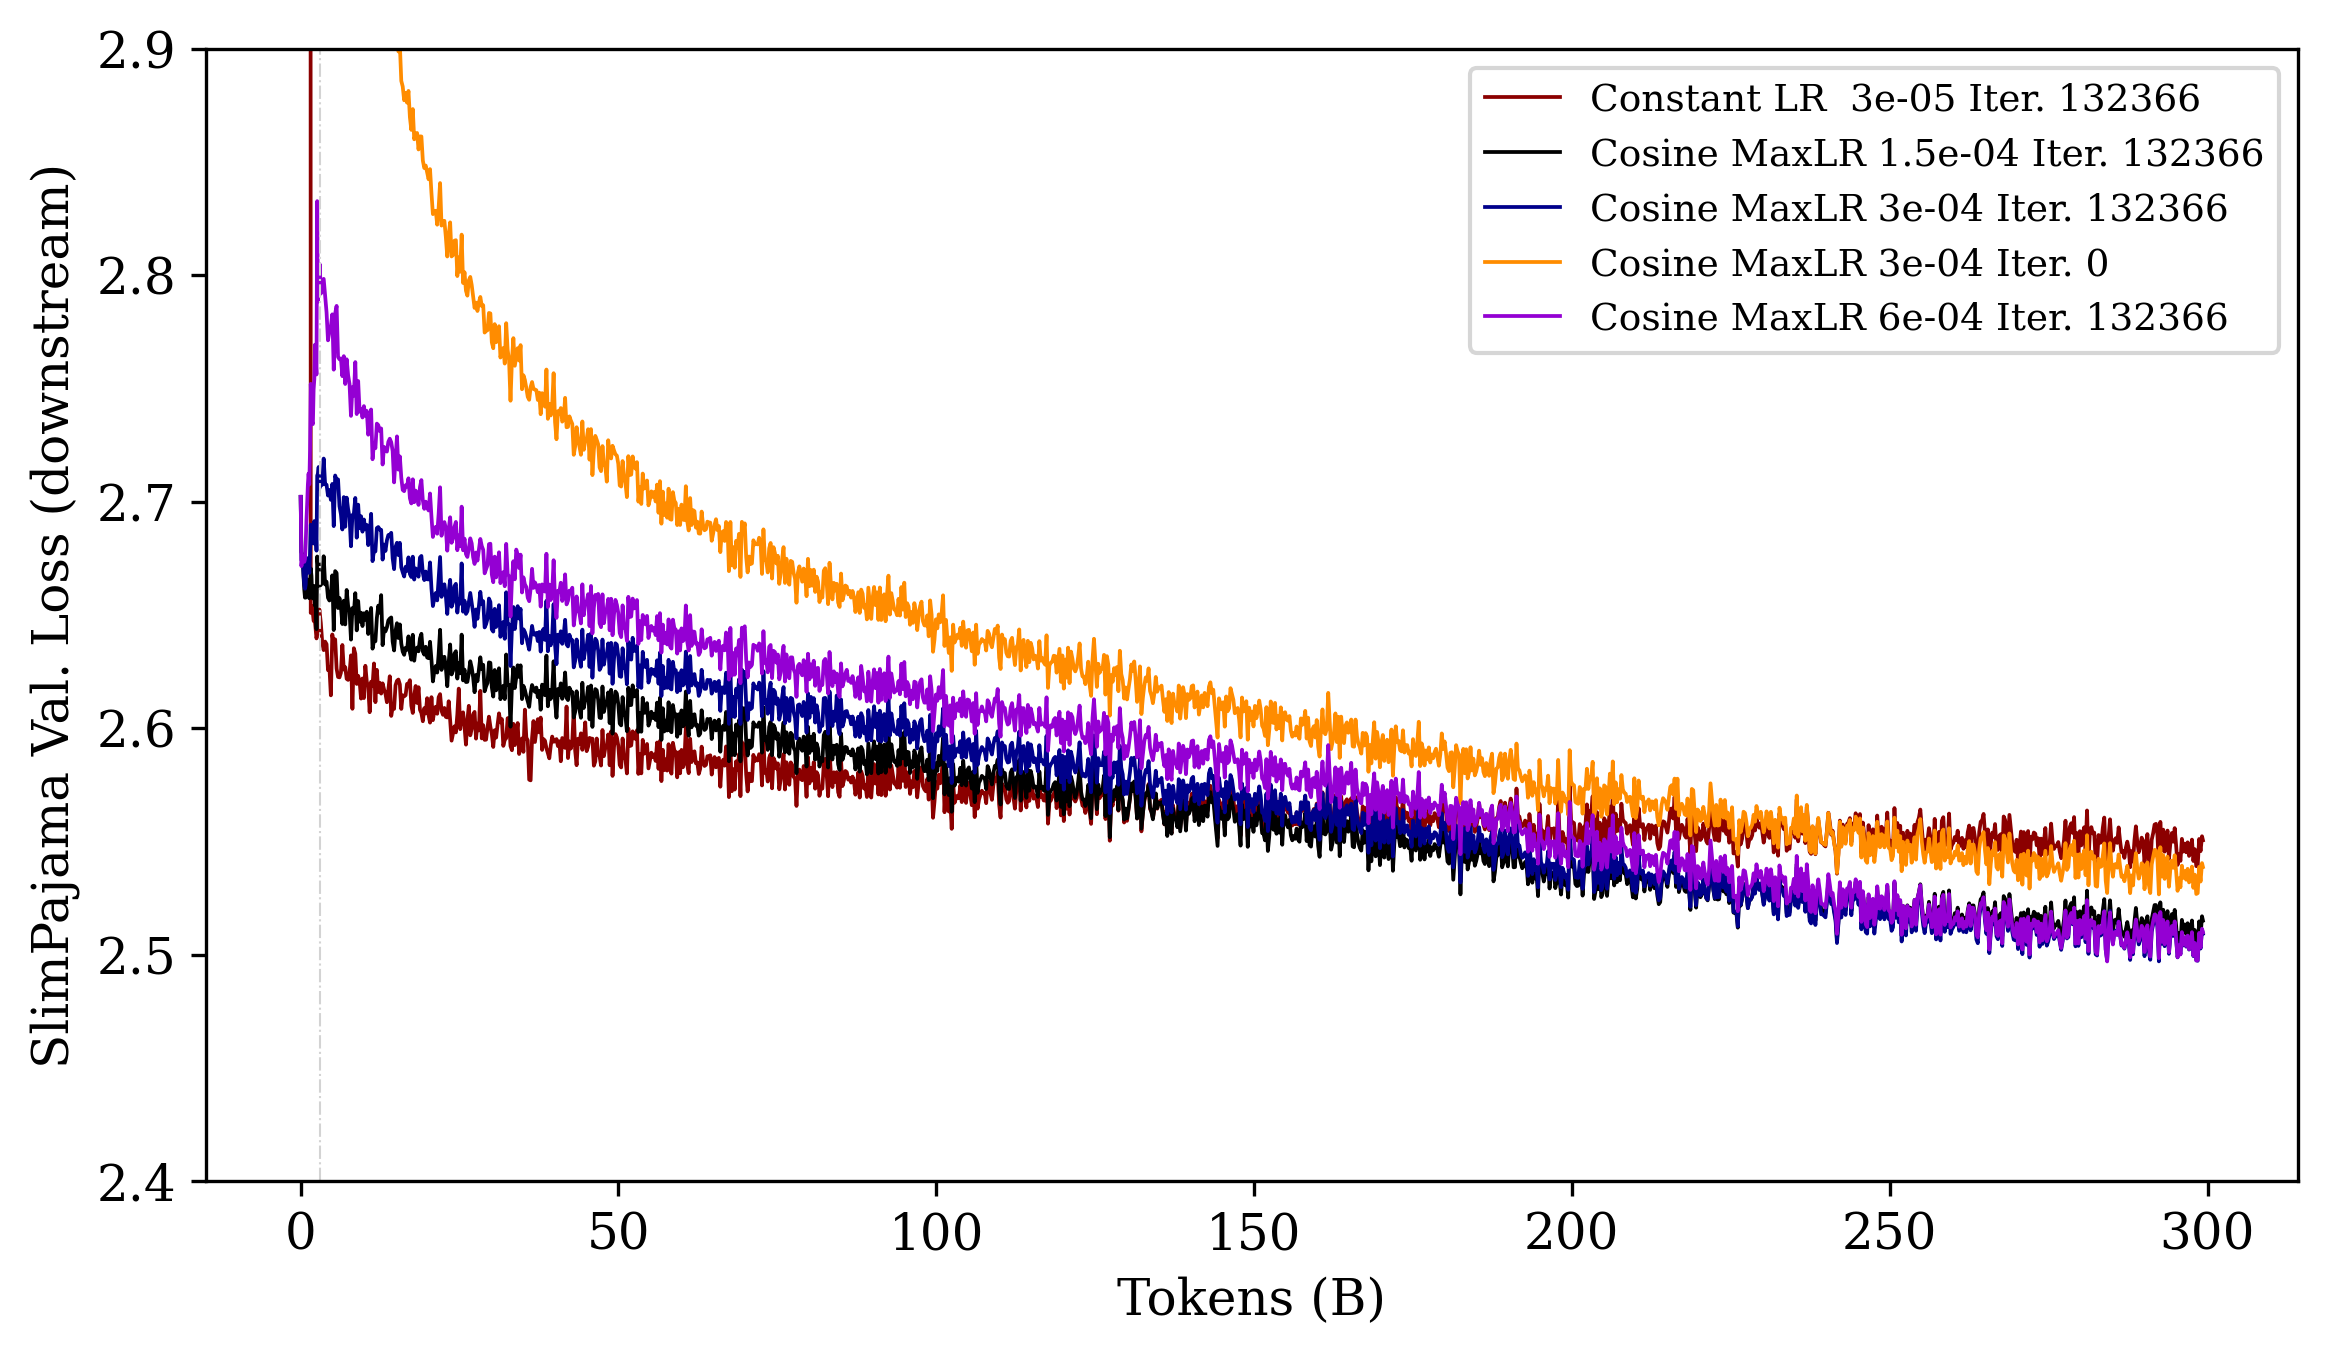

In [94]:
plot_single(filter_=['Tr=pile-train'], #['WU=0.005','WU=0.02','WU=0.0 MaxLR=3e-04','WU=0.0 MaxLR=1.5e-04','WU=0.0 MaxLR=6e-04','27000','10000'],
            upper_limit=300,#step_to_token(105837.0),#300,#step_to_token(105837.0),
            key_to_plot='validation/val_1/lm_loss',#'train/learning_rate',#'validation/val_1/lm_loss',#'train/learning_rate',# #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='SlimPajama Val. Loss (downstream)', 
            savepath="model.pdf",
            legend_kwargs=dict(fontsize=9),
            ylim=(2.4,2.9),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':False,'0.005':False},
            default_colors=cp1,
            label_dict={x:get_caption(x,use=dict(mx=False,wu=True,mn=True,ds=False,it=False, sh=True)) \
                        for x in rd_clone.keys()})

In [ ]:
plot_single(filter_=['Pile','WU=0.005','WU=0.02',
                        'WU=0.0 MaxLR=3e-04','WU=0.0 MaxLR=1.5e-04',
                        'WU=0.0 MaxLR=6e-04',
                    '27000','10000'],
            upper_limit=step_to_token(105837.0), #300,#step_to_token(105837.0),#300,#step_to_token(105837.0),
            key_to_plot='validation/val_1/lm_loss',#'train/learning_rate',# #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='SlimPajama Val. Loss (downstream)', 
            savepath="wu=0.01-RP-val-loss-RP-models-240B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(2.44,2.92),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':False,'0.005':False},
           default_colors=cp1,
            label_dict={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=True)) \
                        for x in rd_clone.keys()})


plot_single(filter_=['Pile','WU=0.005','WU=0.02',
                        'WU=0.0 MaxLR=3e-04','WU=0.0 MaxLR=1.5e-04',
                        'WU=0.0 MaxLR=6e-04',
                    '27000','10000'],
            upper_limit=step_to_token(105837.0),#300,#step_to_token(105837.0),#300,
            key_to_plot='validation/val_0/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='Pile Val. Loss (upstream)', 
            savepath="wu=0.01-Pile-val-loss-RP-models-240B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(2.28,2.92),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':False,'0.005':False},
           default_colors=cp1,
            label_dict={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=True)) \
                        for x in rd_clone.keys()})

['It=132366', 'WU=0.0', 'MaxLR=3e-05', 'MinLR=3e-05', 'Sch=constant', 'Tr=slim-pajama-300B', 'Postfix=finetune']


KeyError: 'sh'

# Main body

In [ ]:
print("overleaf figure 1")
key_to_plot = 'validation/val_0/lm_loss' #pile
key_to_plot = 'validation/val_1/lm_loss' #RP


plot_single(filter_=['Pile','MaxLR=1.5e-04','MaxLR=6e-04','MaxLR=3e-05','WU=0.0005',
                    '27000','10000','scratch'],
            upper_limit=50,
            key_to_plot='validation/val_1/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='SlimPajama Val. Loss (downstream)',
            savepath="lr=3e-4-RP-val-loss-RP-models-50B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(2.66,2.88),#(2.18,2.58),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':True,'0.005':True},
           default_colors=cp1,
            label_dict={x:get_caption(x,use=dict(mx=False,wu=True,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()})


plot_single(filter_=['Pile','MaxLR=1.5e-04','MaxLR=6e-04','MaxLR=3e-05',
                    '27000','10000','scratch'],
            upper_limit=50,
            key_to_plot='validation/val_0/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='Pile Val. Loss (upstream)',
            savepath="lr=3e-4-pile-val-loss-RP-models-50B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(2.18,2.65),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':True,'0.005':True},
           default_colors=cp1,
            label_dict={x:get_caption(x,use=dict(mx=False,wu=True,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()})

In [ ]:
plot_single(filter_=['Pile','WU=0.005','WU=0.02',
                        'WU=0.0 MaxLR=3e-04','WU=0.0 MaxLR=1.5e-04',
                        'WU=0.0 MaxLR=6e-04',
                    '27000','10000','scratch'],
            upper_limit=50,
            key_to_plot='validation/val_1/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='SlimPajama Val. Loss (downstream)', 
            savepath="wu=0.01-RP-val-loss-RP-models-50B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(2.61,2.92),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':False,'0.005':False},
           default_colors=cp1,
            label_dict={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()})

In [ ]:
plot_single(filter_=['WU=0.005','WU=0.02','RP',
                     'WU=0.0 MaxLR=3e-04',
                     'WU=0.0 MaxLR=1.5e-04',
                     'WU=0.0 MaxLR=6e-04'],
            upper_limit=50,
            key_to_plot='validation/val_1/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='SlimPajama Val. Loss (downstream)',
            savepath="wu=0.01-RP-val-loss-Pile-models-50B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(2.72,3.02),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':False,'0.005':False},
           default_colors=cp1,
            label_dict={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()})


plot_single(filter_=['WU=0.005','WU=0.02','RP',
                     'WU=0.0 MaxLR=3e-04',
                     'WU=0.0 MaxLR=1.5e-04',
                     'WU=0.0 MaxLR=6e-04'],
            upper_limit=50,
            key_to_plot='validation/val_0/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='Pile Val. Loss \n(downstream & upstream)',
            savepath="wu=0.01-Pile-val-loss-Pile-models-50B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(),#(2.72,3.02),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':False,'0.005':False},
           default_colors=cp1,
            label_dict={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()})

In [ ]:
print("overleaf figure 3")
key_to_plot = 'validation/val_0/lm_loss' #pile
key_to_plot = 'validation/val_1/lm_loss' #RP




cd={
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP":'red',
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP27000":'blue',
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP10000":'black',
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP":'red',
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP10000":'black',
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP27000":'blue',}

cd={
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP":cp1[0],
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP27000":cp1[2],
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP10000":cp1[1],
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP":cp1[0],
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP10000":cp1[1],
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP27000":cp1[2],}

lsd={
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP":"--",
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP27000":"--",
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP10000":"--",
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP":"-",
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP10000":"-",
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP27000":"-",}


plot_single(filter_=['Pile','MaxLR=1.5e-04','MaxLR=6e-04','MaxLR=3e-05','WU=0.005','WU=0.02',
                'scratch'],
            upper_limit=50,
            key_to_plot='validation/val_1/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='SlimPajama Val. Loss (downstream)',
            savepath="lr=3e-4-RP-val-loss-RP-10-27-models-50B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(2.62,3.15),#(2.18,2.58),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':False,'0.005':False},
           color_dict=cd,
           ls_dict=lsd,
            label_dict={x:get_caption(x,use=dict(mx=False,wu=True,mn=False,ds=False,it=True)) \
                        for x in rd_clone.keys()})


plot_single(filter_=['Pile','MaxLR=1.5e-04','MaxLR=6e-04','MaxLR=3e-05','WU=0.005','WU=0.02',
                   'scratch'],
            upper_limit=50,
            key_to_plot='validation/val_0/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='Pile Val. Loss (upstream)',
            savepath="lr=3e-4-pile-val-loss-RP-10-27-models-50B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(2.18,2.78),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':False,'0.005':False},
           color_dict=cd,
           ls_dict=lsd,
            label_dict={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=True)) \
                        for x in rd_clone.keys()})

# Appendix figues

In [ ]:
ls1 = ['-', '--', '-.', ':']
plot_single(filter_=['Pile',#'MaxLR=1.5e-04',#'MaxLR=6e-04','MaxLR=3e-05',
                    '27000','10000','scratch'],
            upper_limit=50,
            key_to_plot='validation/val_0/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='Pile Val. Loss (upstream)',
            savepath="all-pile-val-loss-RP-models-50B.pdf",
            legend_kwargs=dict(fontsize=7),
            ylim=(2.18, 2.65),
            figsize=(7.5,5),
            warmup_end={'0.01':True,'0.02':True,'0.005':True},
           circles=True,
            default_ls =["-"] +[ls1[y] for x in range(3)for y in range(4)],
           default_colors=[cp1[3]] +[cp1[x] for x in range(3)for y in range(4)],
            label_dict={x:get_caption(x,use=dict(mx=True,wu=True,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()})

In [ ]:
[cp1[0]] +[cp1[x] for x in range(4)for y in range(3)]

In [ ]:
ls1 = ['-', '--', '-.', ':']

plot_single(filter_=['Pile',
                    '27000','10000','scratch'],
            upper_limit=50,
            key_to_plot='validation/val_1/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='Red Pajama Val. Loss (downstream)',
            savepath="all-RP-val-loss-RP-models-50B.pdf",
            legend_kwargs=dict(fontsize=6),
            ylim=(2.61,2.88),#(2.18,2.58),
            figsize=(7.5,5),
            warmup_end={'0.01':True,'0.02':True,'0.005':True},
            default_ls =['-'] +[ls1[y] for x in range(3)for y in range(4)],
           default_colors=[cp1[3]] +[cp1[x] for x in range(3)for y in range(4)])

overleaf figure 3


FileNotFoundError: [Errno 2] No such file or directory: 'esfomows/lr=3e-4-RP-val-loss-RP-10-27-scratch-models-50B.pdf'

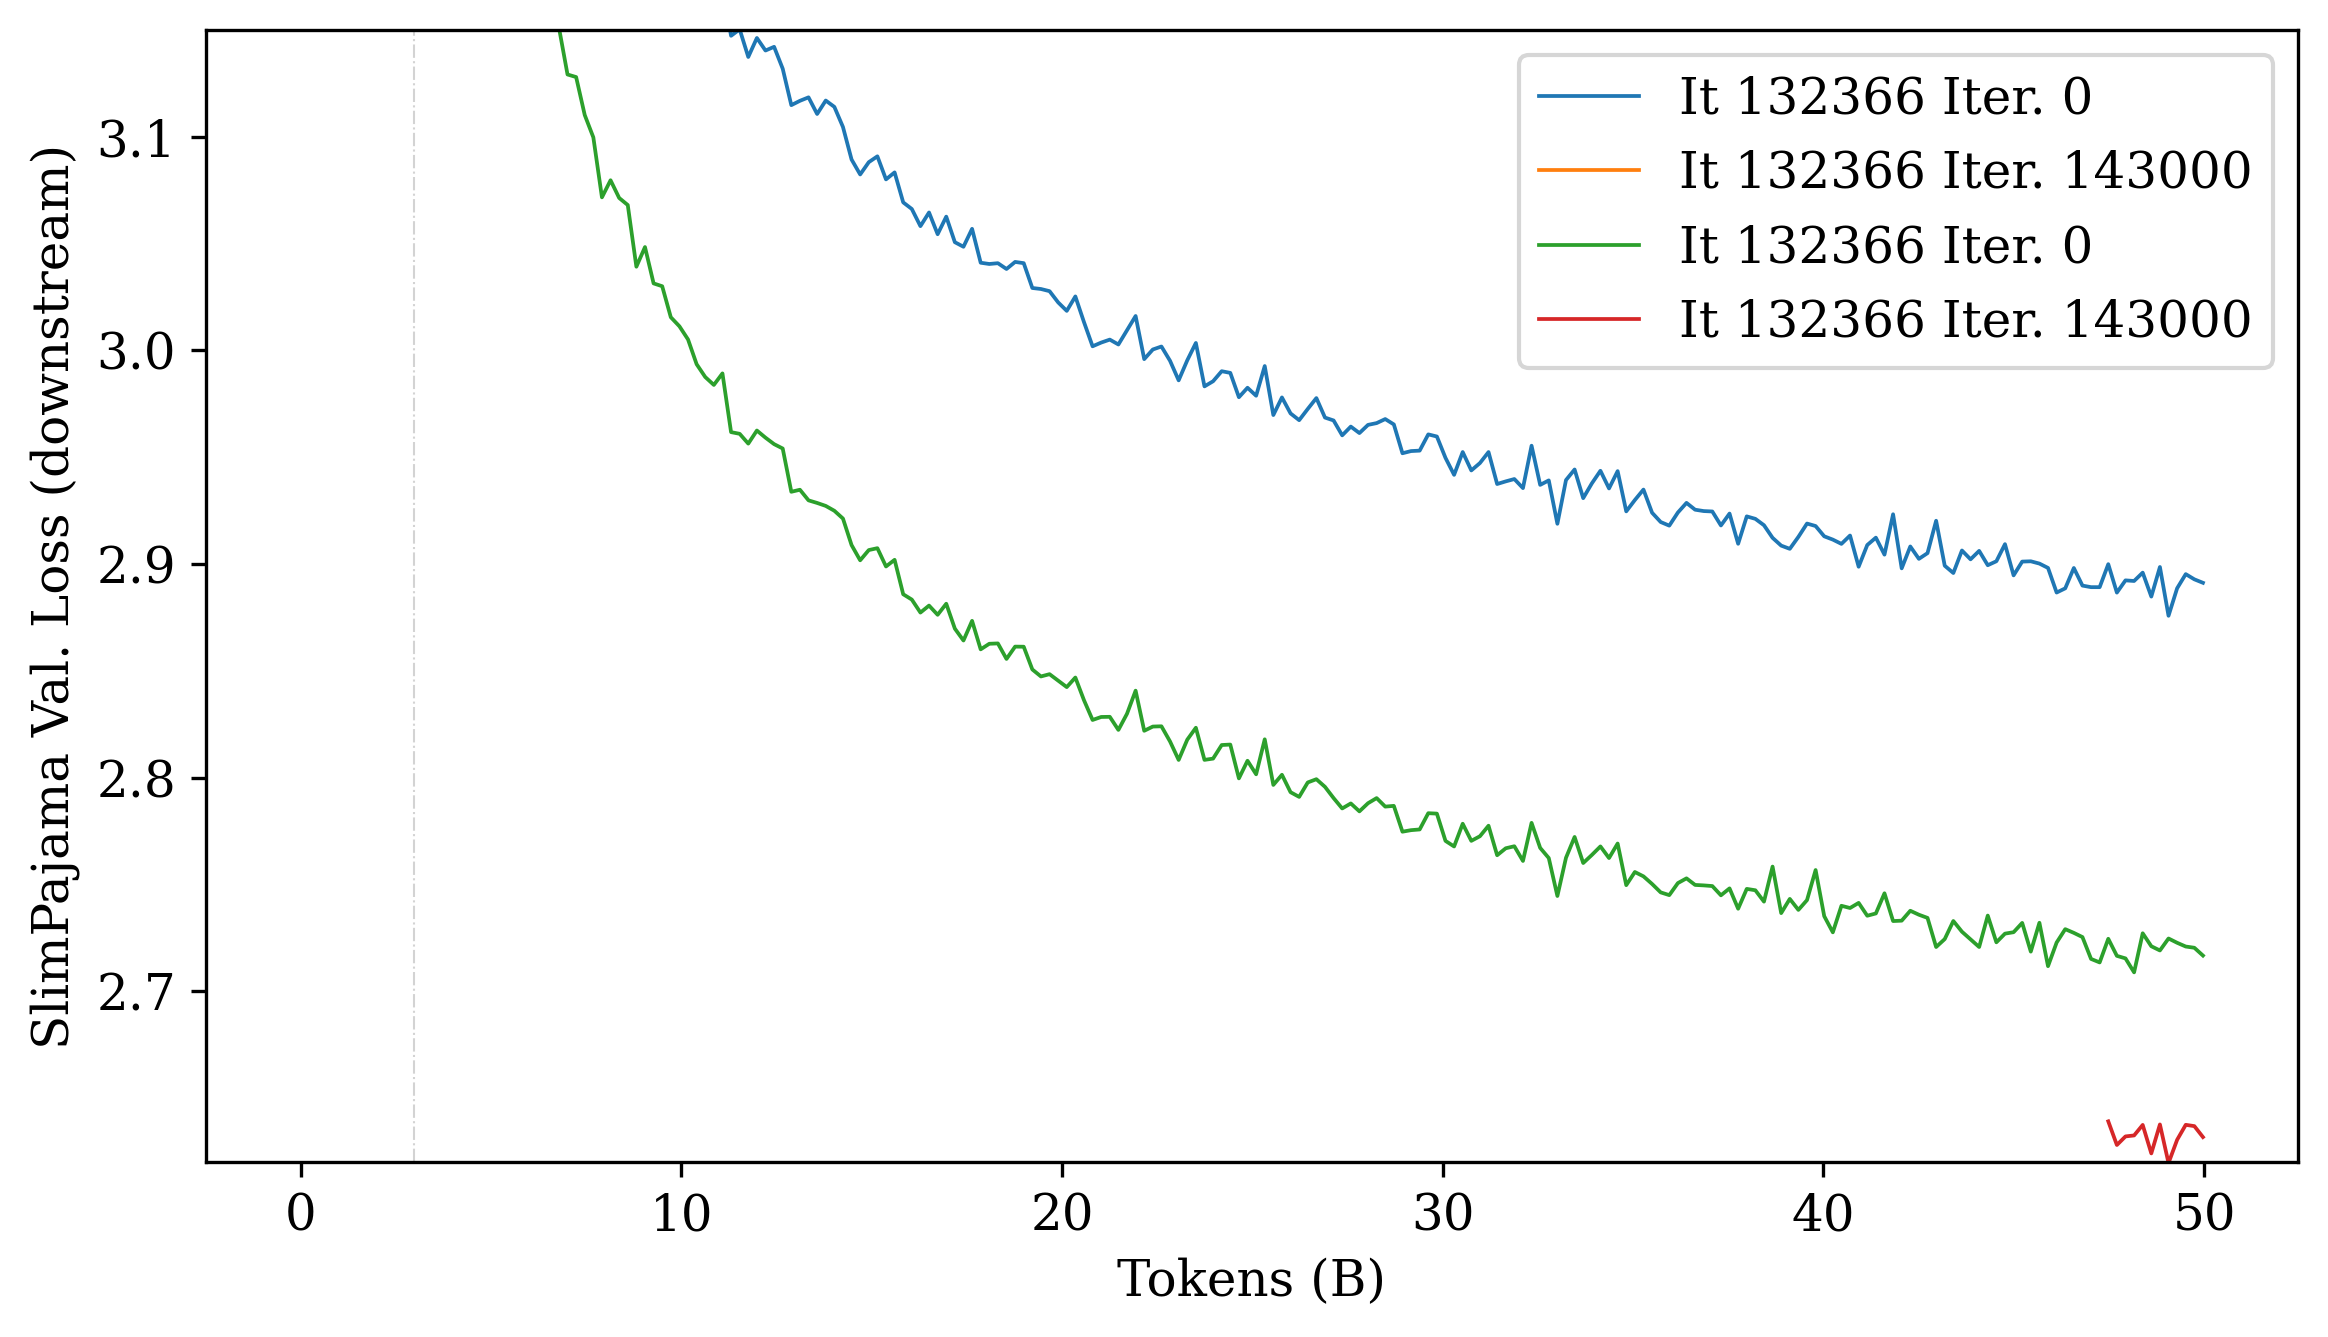

In [38]:
print("overleaf figure 3")
key_to_plot = 'validation/val_0/lm_loss' #pile
key_to_plot = 'validation/val_1/lm_loss' #RP




cd={
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP":'red',
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP27000":'blue',
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP10000":'black',
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP":'red',
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP10000":'black',
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP27000":'blue',}

cd={
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP":cp1[0],
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP27000":cp1[2],
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP10000":cp1[1],
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP":cp1[0],
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RPscratch":cp1[3],
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP10000":cp1[1],
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP27000":cp1[2],}

lsd={
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP":"--",
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP27000":"--",
"WU=0.0 MaxLR=3e-04 MinLR=3e-05 RP10000":"--",
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP":"-",
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP10000":"-",
"WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP27000":"-",}


plot_single(filter_=['Pile','MaxLR=1.5e-04','MaxLR=6e-04','MaxLR=3e-05','WU=0.005','WU=0.02',
#                 'scratch'
                    ],
            upper_limit=50,
            key_to_plot='validation/val_1/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='SlimPajama Val. Loss (downstream)',
            savepath="lr=3e-4-RP-val-loss-RP-10-27-scratch-models-50B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(2.62,3.15),#(2.18,2.58),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':False,'0.005':False},
           color_dict=cd,
           ls_dict=lsd,
            label_dict={x:get_caption(x,use=dict(mx=False,wu=True,mn=False,ds=False,it=True)) \
                        for x in rd_clone.keys()})


plot_single(filter_=['Pile','MaxLR=1.5e-04','MaxLR=6e-04','MaxLR=3e-05','WU=0.005','WU=0.02',
#                    'scratch'
                    ],
            upper_limit=50,
            key_to_plot='validation/val_0/lm_loss', #0:pile 1:RP
            ylabel='Tokens (B)',
            xlabel='Pile Val. Loss (upstream)',
            savepath="lr=3e-4-pile-val-loss-RP-10-27-scratch-models-50B.pdf",
            legend_kwargs=dict(fontsize=12),
            ylim=(2.18,2.83),
            figsize=(9,5),
            warmup_end={'0.01':True,'0.02':False,'0.005':False},
           color_dict=cd,
           ls_dict=lsd,
            label_dict={x:get_caption(x,use=dict(mx=False,wu=True,mn=False,ds=False,it=True)) \
                        for x in rd_clone.keys()})

In [39]:

import random
random.seed(5)
marker_styles = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', '+', 'x', 'D', 'd', '_', '|']
random.shuffle(marker_styles)

In [40]:
import numpy as np
step_to_token = lambda x : x * 2260992/1000000000

def plot_with_cmap(filter_=['Pile','MaxLR=1.5e-04','MaxLR=6e-04','MaxLR=3e-05'],
                upper_limit=50,
                key_to_plot='validation/val_0/lm_loss',
                ylabel='Tokens (B)',
                xlabel='Pile Val Loss',
                savepath=None, #"lr3e-4-Pile-val-loss-warmup-50B.pdf",
                legend_kwargs=dict(fontsize=12),
                ylim=(2.18,2.55),
                figsize=(7.5,5),
                warmup_end={'0.01':True,'0.02':True,'0.005':True},
                skip=6,
                cmap_label='Tokens (B)',
                key_map={},
                savedir='esfomows/',
               ):

    fig, ax = plt.subplots(figsize=figsize)
    cmap = plt.cm.viridis

    for i,(k,v) in enumerate(rd_clone.items()):
        if len(v) == 0 or reduce(np.logical_or,[x in k for x in filter_]):
            continue
            
        print(f"\"{k}\":")
            
        v0 = np.array(v['validation/val_0/lm_loss_ppl']) #pile
        v1 = np.array(v['validation/val_1/lm_loss_ppl']) #red pajama
        
        if v1.shape != v0.shape:
            v0 = v0[:v1.shape[0],:]
        iters_ = step_to_token(v0[:,0])
        
        w = np.where(iters_ < upper_limit)
        v0 = v0[w[0],:]
        v1 = v1[w[0],:]

        scatter = ax.scatter(
                   v1[::skip,1],
                   v0[::skip,1],
                   c=step_to_token(v0[::skip,0]),
                   label=key_map.get(k,k),
                   marker=marker_styles[i],
                   cmap=cmap)
        scatter.set_clim(0,upper_limit)

        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)

    for i,(k,v) in enumerate(rd_clone.items()):  
        if len(v) == 0 or reduce(np.logical_or,[x in k for x in filter_]):
            continue

        v0 = np.array(v['validation/val_0/lm_loss_ppl']) #pile
        v1 = np.array(v['validation/val_1/lm_loss_ppl']) #red pajama
        # 662, 1318, 2633
        ax.scatter(v1[0,1],
                   v0[0,1],
                   color='red',
                   marker=marker_styles[i])
            
        if warmup_end['0.005']:
            w = np.where(np.logical_and(v0[:,0]<670,650<v0[:,0]))
            print(w)
            ax.scatter(v1[w,1],
                       v0[w,1],
                       color='lime',
                       marker=marker_styles[i])
            
        if warmup_end['0.01']:
            w = np.where(np.logical_and(v0[:,0]<1330,1310<v0[:,0]))
            ax.scatter(v1[w,1],
                       v0[w,1],
                       color='lime',
                       marker=marker_styles[i])
        
        if warmup_end['0.02']:
            w = np.where(np.logical_and(v0[:,0]<2640,2620<v0[:,0]))
            ax.scatter(v1[w,1],
                       v0[w,1],
                       color='lime',
                       marker=marker_styles[i])

        

    ax.legend(**legend_kwargs)


    sm = plt.colorbar(scatter, #plt.cm.ScalarMappable(), 
                      ax=ax, 
                      cmap=cmap)#, clim=(0,100))
    # Customize colorbar
    sm.set_label(cmap_label)
    if savepath:
        plt.savefig(savedir+savepath,bbox_inches='tight')
        savepath = savepath[:-4] + '.png'
        plt.savefig(savedir+savepath,bbox_inches='tight')
    plt.show()
    

"It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 Sch=cosine Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train resume":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=6e-04 MinLR=6e-05 Sch=cosine Tr=slim-pajama-300B finetune":
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


FileNotFoundError: [Errno 2] No such file or directory: 'esfomows/wu=0.01-pile-RP-val-loss-RP-models-50B.pdf'

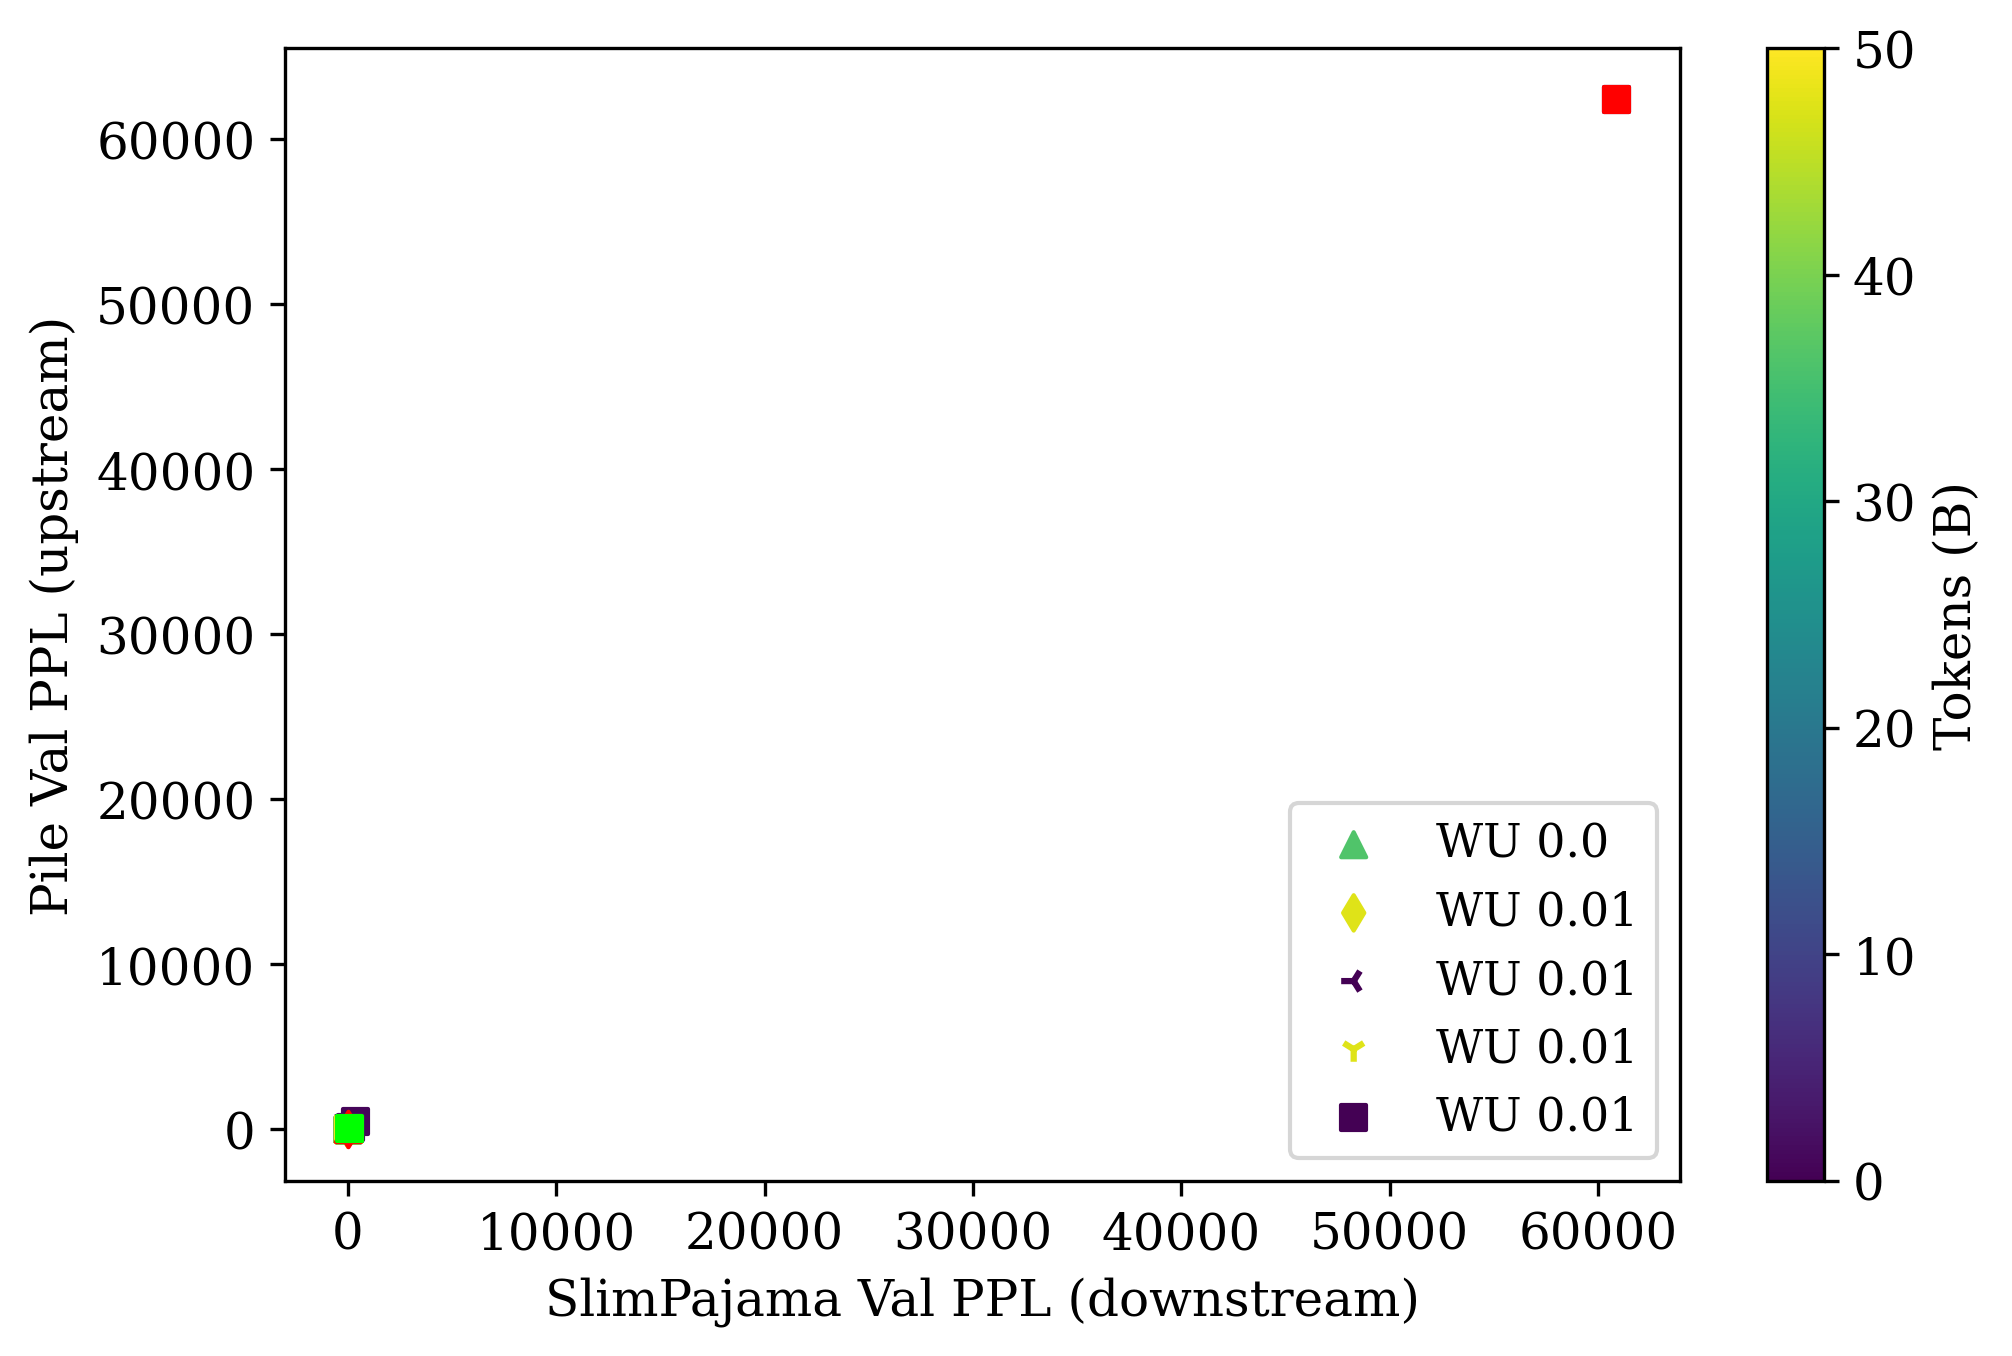

In [41]:
plot_with_cmap(filter_=['WU=0.005','WU=0.02','Pile',
                        'WU=0.0 MaxLR=3e-04','WU=0.0 MaxLR=1.5e-04',
                        'WU=0.0 MaxLR=6e-04',
                        '27000','10000','scratch'
                       ],
                upper_limit=50,
                key_to_plot='validation/val_0/lm_loss',
                ylabel='Pile Val PPL (upstream)',
                xlabel='SlimPajama Val PPL (downstream)',
                savepath="wu=0.01-pile-RP-val-loss-RP-models-50B.pdf",
                legend_kwargs=dict(fontsize=11,loc="lower right"),
                ylim=(2.18,2.55),
                figsize=(7.5,5),
                warmup_end={'0.01':True,'0.02':True,'0.005':True},
                skip=6,
                cmap_label='Tokens (B)',
            key_map={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()}
#                key_map={
#                    "WU=0.0 MaxLR=3e-05 MinLR=3e-05 RP": "3e-05 Constant WU=0.0",
#                    "WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 RP": "1.5e-04 consine WU=0.01",
#                     "WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP": "3e-04 consine WU=0.01",
#                     "WU=0.01 MaxLR=6e-04 MinLR=6e-05 RP": "6e-04 cosine WU=0.01",
                   
#                }
               )

In [42]:
# random.seed(3)
# marker_styles = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', '+', 'x', 'D', 'd', '_', '|']
# random.shuffle(marker_styles)

"It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B scratch":
"It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 Sch=cosine Tr=slim-pajama-300B scratch":
"It=132366 WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 Sch=cosine Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train scratch":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train resume":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B scratch":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=6e-04 MinLR=6e-05 Sch=cosine Tr=slim-pajama-300B scratch":
"It=132366 WU=0.01 MaxLR=6e-04 MinLR=6e-05 Sch=cosine Tr=slim-pajama-300B finetune":


FileNotFoundError: [Errno 2] No such file or directory: 'esfomows/wu=0.01-pile-RP-val-ppl-pile-models-50B.pdf'

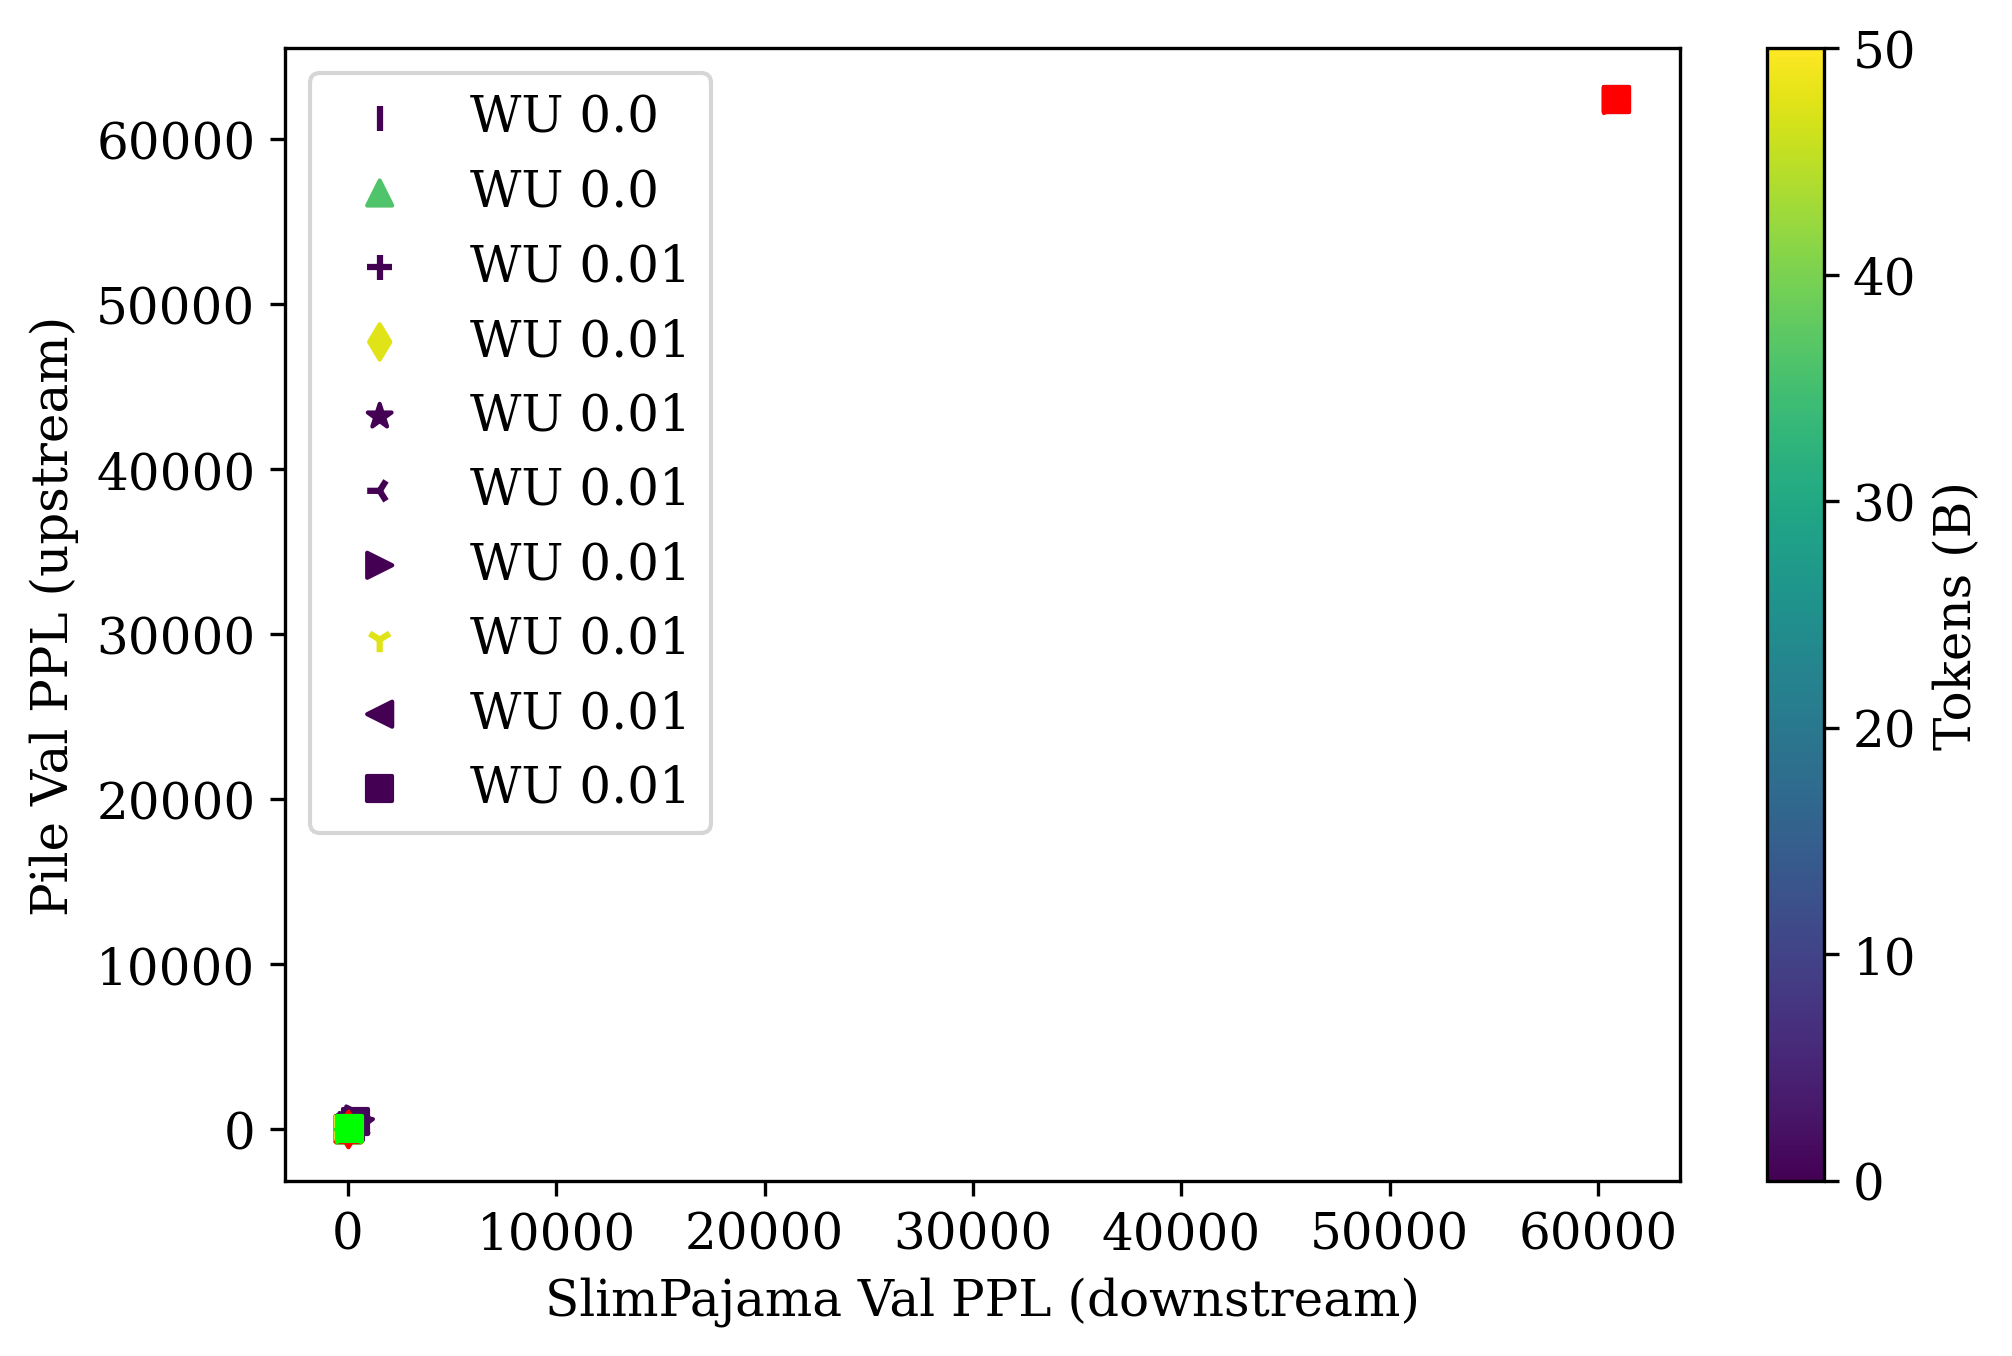

In [43]:
plot_with_cmap(filter_=['WU=0.005','WU=0.02','RP',
                        'WU=0.0 MaxLR=3e-04','WU=0.0 MaxLR=1.5e-04',
                        'WU=0.0 MaxLR=6e-04',
                        '27000','10000'],
                upper_limit=50,
                key_to_plot='validation/val_0/lm_loss',
                ylabel='Pile Val PPL (upstream)',
                xlabel='SlimPajama Val PPL (downstream)',
                savepath="wu=0.01-pile-RP-val-ppl-pile-models-50B.pdf",
                legend_kwargs=dict(fontsize=12),
                ylim=(2.18,2.55),
                figsize=(7.5,5),
                warmup_end={'0.01':True,'0.02':False,'0.005':False},
                skip=6,
                cmap_label='Tokens (B)',
            key_map={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()}
               )

"It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 Sch=cosine Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train resume":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=6e-04 MinLR=6e-05 Sch=cosine Tr=slim-pajama-300B finetune":
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


FileNotFoundError: [Errno 2] No such file or directory: 'esfomows/wu=0.01-pile-RP-val-loss-RP-models-300B.pdf'

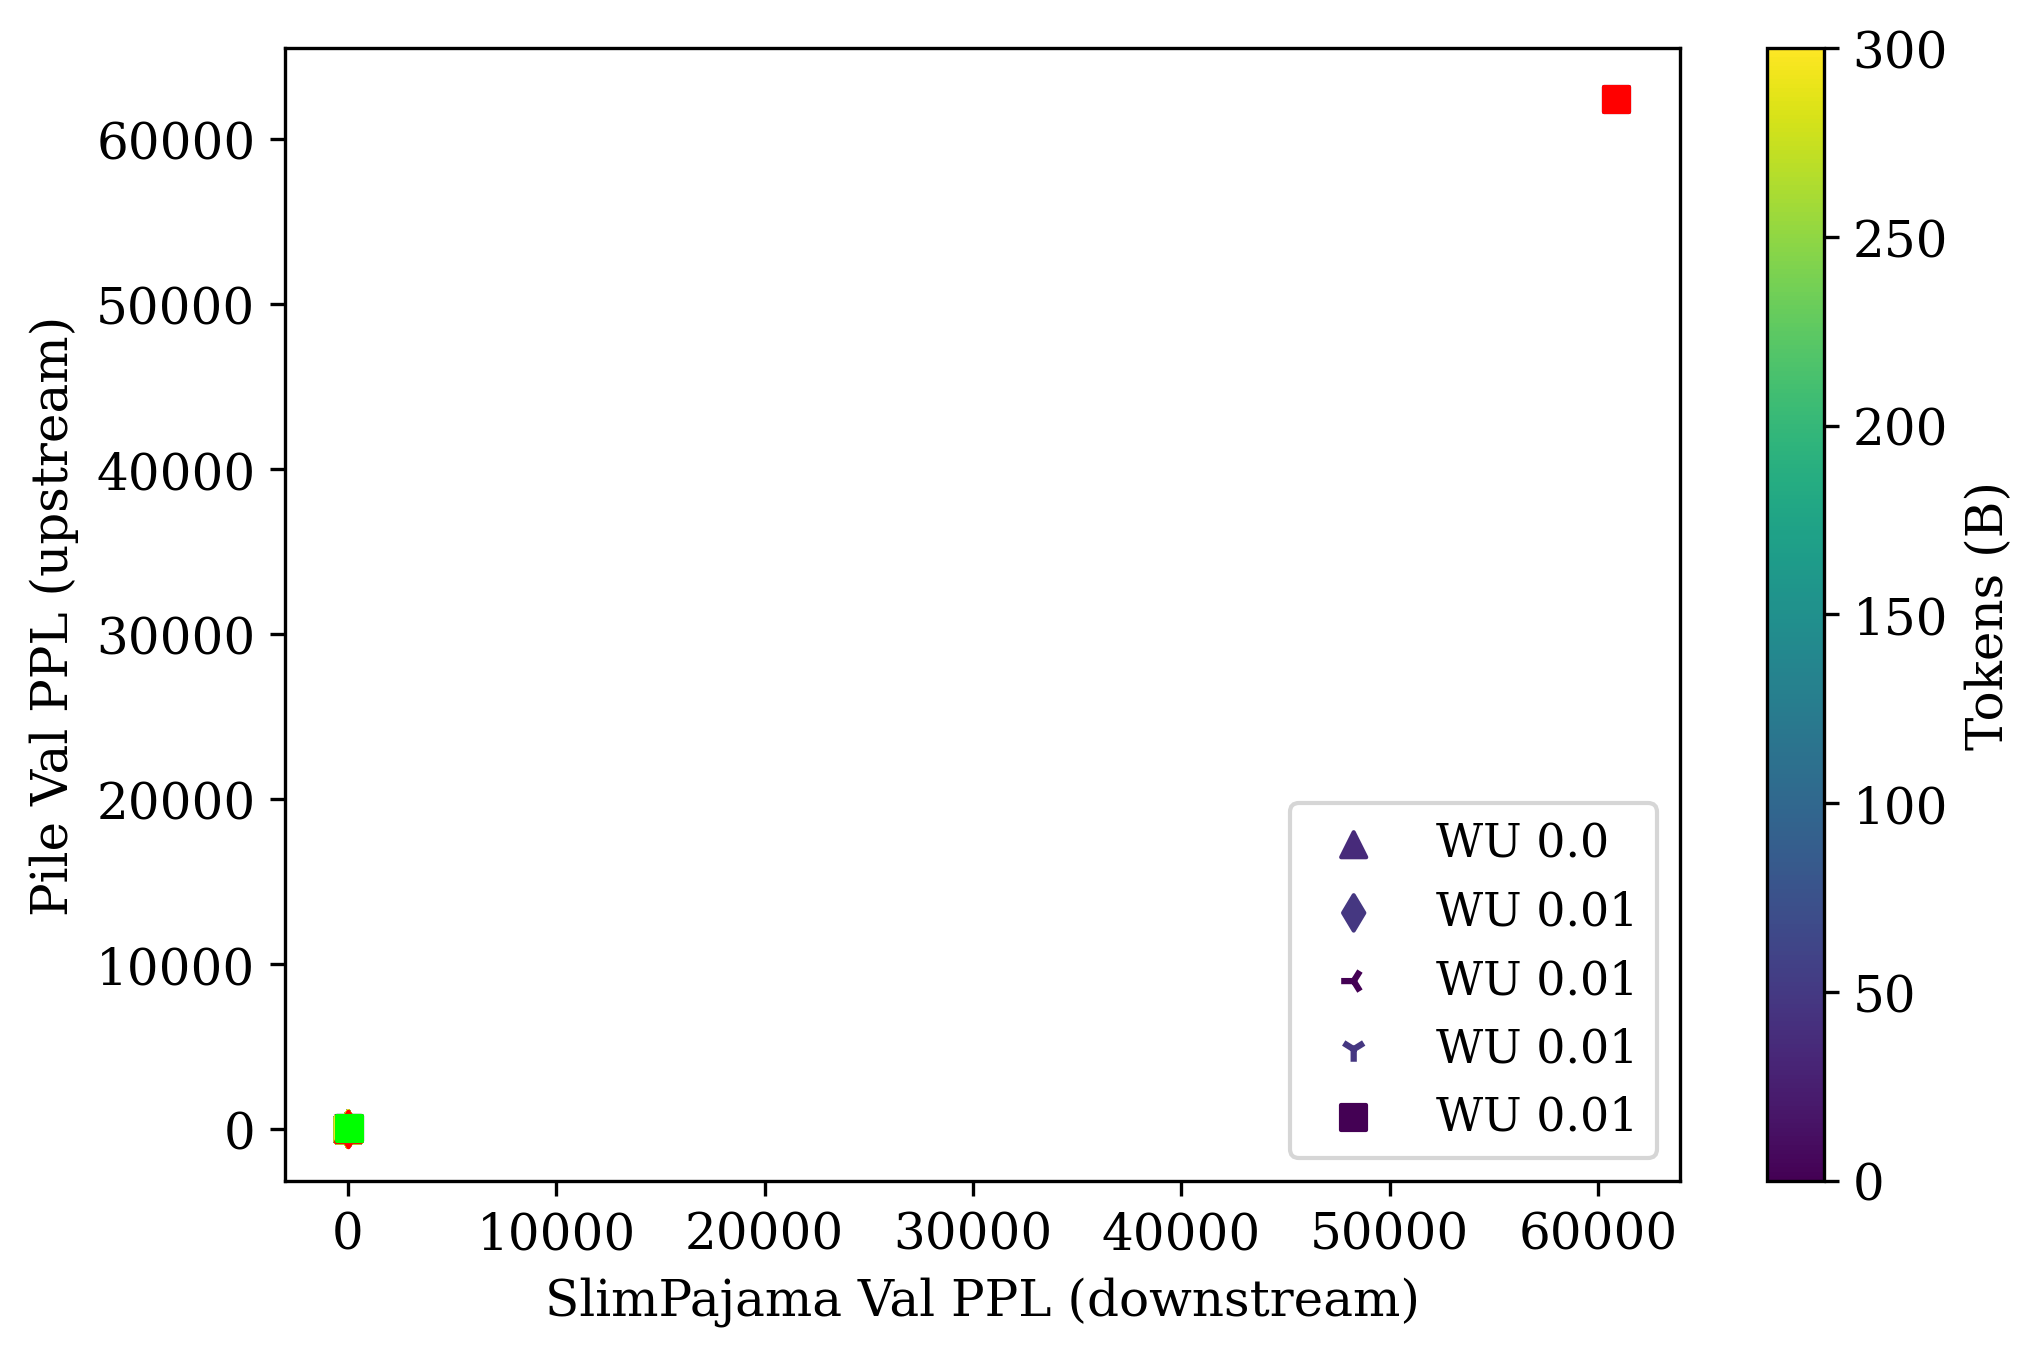

In [44]:
plot_with_cmap(filter_=['WU=0.005','WU=0.02','Pile',
                        'WU=0.0 MaxLR=3e-04','WU=0.0 MaxLR=1.5e-04',
                        'WU=0.0 MaxLR=6e-04',
                        '27000','10000','scratch'
                       ],
                upper_limit=300,
                key_to_plot='validation/val_0/lm_loss',
                ylabel='Pile Val PPL (upstream)',
                xlabel='SlimPajama Val PPL (downstream)',
                savepath="wu=0.01-pile-RP-val-loss-RP-models-300B.pdf",
                legend_kwargs=dict(fontsize=11,loc="lower right"),
                ylim=(2.18,2.55),
                figsize=(7.5,5),
                warmup_end={'0.01':True,'0.02':True,'0.005':True},
                skip=15,
                cmap_label='Tokens (B)',
            key_map={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()}
#                key_map={
#                    "WU=0.0 MaxLR=3e-05 MinLR=3e-05 RP": "3e-05 Constant WU=0.0",
#                    "WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 RP": "1.5e-04 consine WU=0.01",
#                     "WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP": "3e-04 consine WU=0.01",
#                     "WU=0.01 MaxLR=6e-04 MinLR=6e-05 RP": "6e-04 cosine WU=0.01",
                   
#                }
               )# to 300B

"It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 Sch=cosine Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train resume":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=6e-04 MinLR=6e-05 Sch=cosine Tr=slim-pajama-300B finetune":
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


FileNotFoundError: [Errno 2] No such file or directory: 'esfomows/wu=0.01-pile-RP-val-loss-RP-models-300B.pdf'

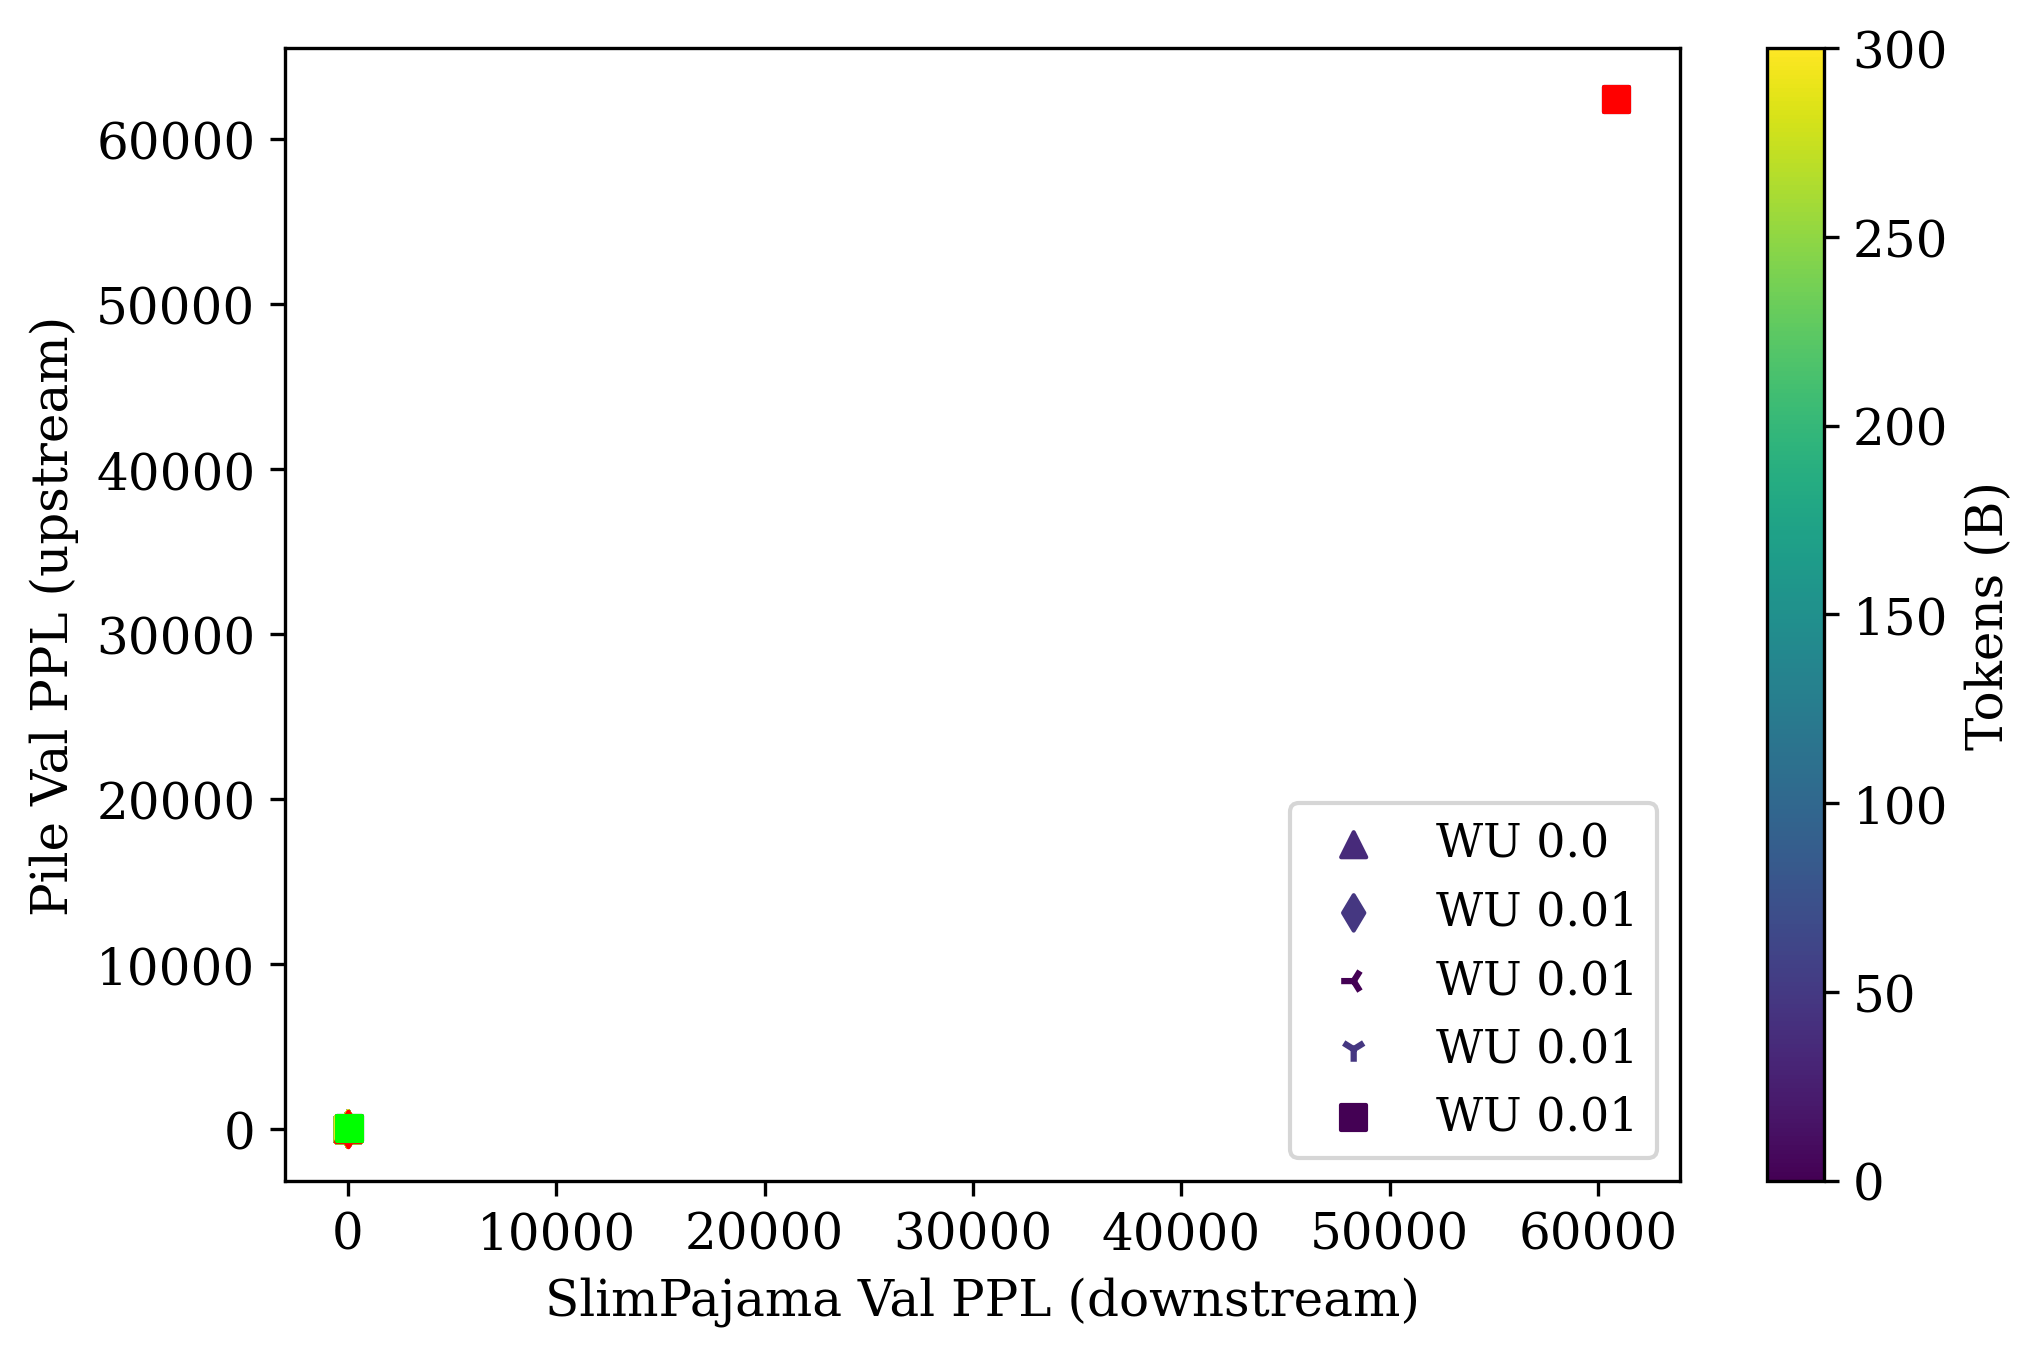

In [45]:
plot_with_cmap(filter_=['WU=0.005','WU=0.02','Pile',
                        'WU=0.0 MaxLR=3e-04','WU=0.0 MaxLR=1.5e-04',
                        'WU=0.0 MaxLR=6e-04',
                        '27000','10000','scratch'
                       ],
                upper_limit=300,
                key_to_plot='validation/val_0/lm_loss',
                ylabel='Pile Val PPL (upstream)',
                xlabel='SlimPajama Val PPL (downstream)',
                savepath="wu=0.01-pile-RP-val-loss-RP-models-300B.pdf",
                legend_kwargs=dict(fontsize=11,loc="lower right"),
                ylim=(2.18,2.55),
                figsize=(7.5,5),
                warmup_end={'0.01':True,'0.02':True,'0.005':True},
                skip=20,
                cmap_label='Tokens (B)',
            key_map={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()}
#                key_map={
#                    "WU=0.0 MaxLR=3e-05 MinLR=3e-05 RP": "3e-05 Constant WU=0.0",
#                    "WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 RP": "1.5e-04 consine WU=0.01",
#                     "WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP": "3e-04 consine WU=0.01",
#                     "WU=0.01 MaxLR=6e-04 MinLR=6e-05 RP": "6e-04 cosine WU=0.01",
                   
#                }
               )

"It=132366 WU=0.0 MaxLR=3e-05 MinLR=3e-05 Sch=constant Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 Sch=cosine Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=pile-train resume":
"It=132366 WU=0.01 MaxLR=3e-04 MinLR=3e-05 Sch=cosine Tr=slim-pajama-300B finetune":
"It=132366 WU=0.01 MaxLR=6e-04 MinLR=6e-05 Sch=cosine Tr=slim-pajama-300B finetune":
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


FileNotFoundError: [Errno 2] No such file or directory: 'esfomows/wu=0.01-pile-RP-val-loss-RP-models-240B.pdf'

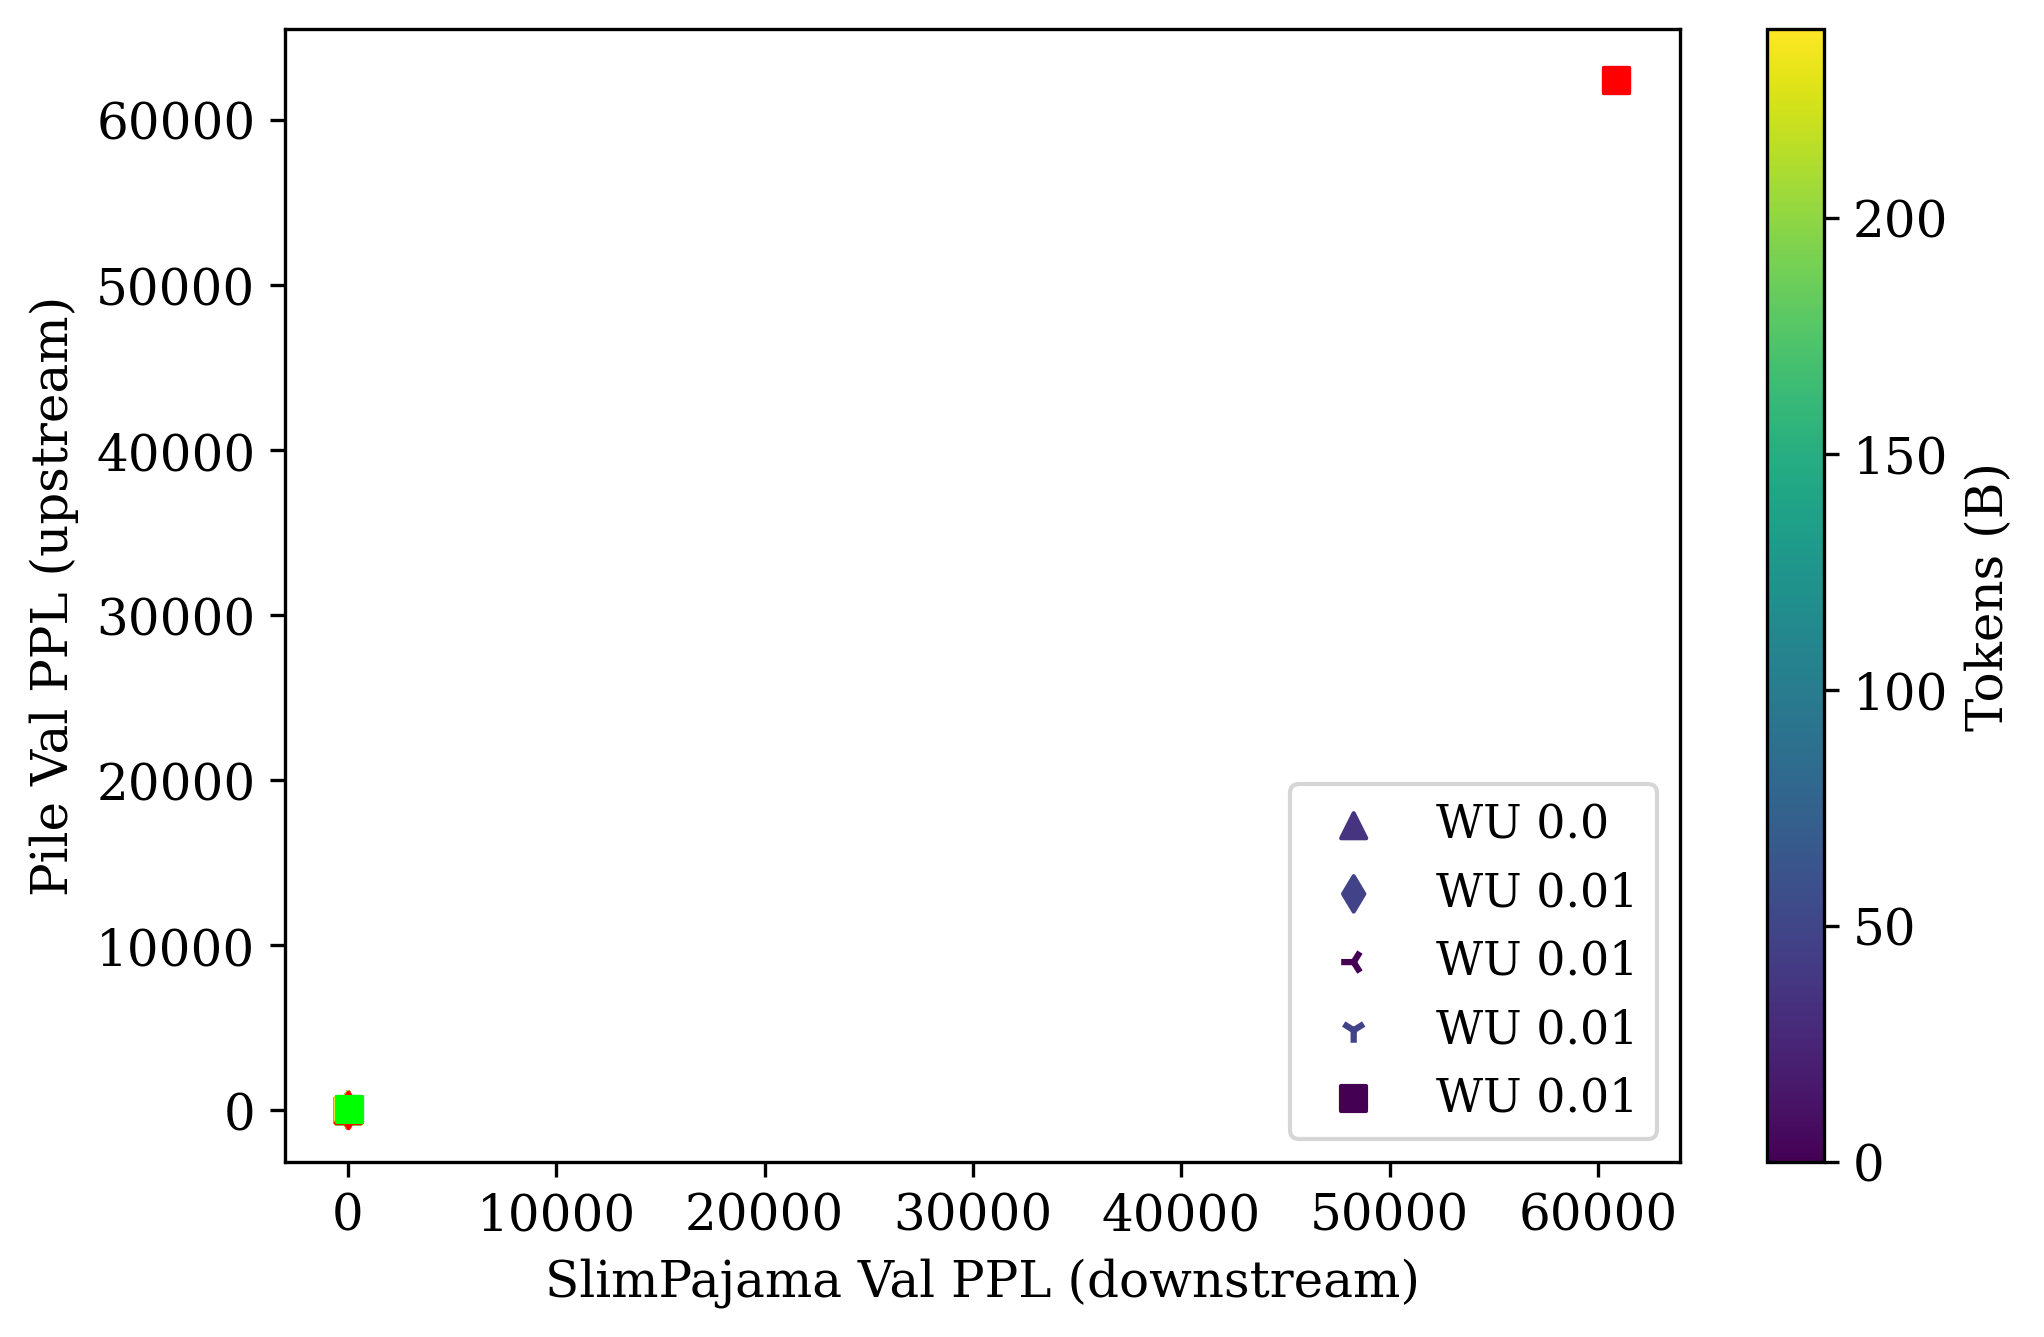

In [46]:
plot_with_cmap(filter_=['WU=0.005','WU=0.02','Pile',
                        'WU=0.0 MaxLR=3e-04','WU=0.0 MaxLR=1.5e-04',
                        'WU=0.0 MaxLR=6e-04',
                        '27000','10000','scratch'
                       ],
                upper_limit=240,
                key_to_plot='validation/val_0/lm_loss',
                ylabel='Pile Val PPL (upstream)',
                xlabel='SlimPajama Val PPL (downstream)',
                savepath="wu=0.01-pile-RP-val-loss-RP-models-240B.pdf",
                legend_kwargs=dict(fontsize=11,loc="lower right"),
                ylim=(2.18,2.55),
                figsize=(7.5,5),
                warmup_end={'0.01':True,'0.02':True,'0.005':True},
                skip=20,
                cmap_label='Tokens (B)',
            key_map={x:get_caption(x,use=dict(mx=True,wu=False,mn=False,ds=False,it=False)) \
                        for x in rd_clone.keys()}
#                key_map={
#                    "WU=0.0 MaxLR=3e-05 MinLR=3e-05 RP": "3e-05 Constant WU=0.0",
#                    "WU=0.01 MaxLR=1.5e-04 MinLR=1.5e-05 RP": "1.5e-04 consine WU=0.01",
#                     "WU=0.01 MaxLR=3e-04 MinLR=3e-05 RP": "3e-04 consine WU=0.01",
#                     "WU=0.01 MaxLR=6e-04 MinLR=6e-05 RP": "6e-04 cosine WU=0.01",
                   
#                }
               )